# Table of Contents

# Lead Scoring Case Study

    Problem Statement - X-Education is an education company sells online Education courses to professionals and marketing through online advertisements. Company gets information through different channels and if candidates enquring with certain education level it calls lead. Typically lead conversion is 30% of certain education. Company identifying Hot Leads on certain criteria also. Lead conversion ratio is lesser than number of enrollment. comapny given Target to achieve 80% of total enrollment

    Aim - Building logistics regression model to finding leads for Company and help to achieve potential targets.Alternative approach should be ready in case Company's requirement changes in futures should be flexible.

### Importing Libraries

In [1]:
# Importing required libraries:-

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To leverage better visibility of data

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

#This code sets the maximum number of columns displayed to 500 and the maximum number of rows displayed to 500 in a Pandas DataFrame for improved data visualization and inspection.

## <font color =brown> 1. Loading and Examining Data

In [3]:
# Reading the 'application_data.csv' using 'read.csv'

dfm = pd.read_csv('Leads.csv')

#dfm - used as a variable to signify the 'Leads.csv' dataset.

### 1.1 Checking the structure of the Dataframe

In [4]:
#Checking the dimensions of the data

dfm.shape

(9240, 37)

In [5]:
# To check the column wise info of the dataframe along with Datatypes

dfm.info(verbose = True)

#verbose - It is used to print the full summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#To check the statistical summary of the data

dfm.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000   
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820   
std     23405.995698     0.486714     4.854853                   548.021466              2.161418   
min    579533.000000     0.000000     0.000000                     0.000000              0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000   
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000   
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000   
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000   

       Asymmetrique Activity Score  Asymmetrique Profile Score  
count                  5022.000000                 5022.000000  
mean                     14.306252                   16.344883  
std                       1.386694                    1.811395  
min                       7.000000                   11.000000  
25%                      14.000000                   15.000000  
50%                      14.000000                   16.000000  
75%                      15.000000                   18.000000  
max                      18.000000                   20.000000

In [7]:
#Checking the head and tail of the table

dfm.head()

Prospect ID  Lead Number              Lead Origin     Lead Source  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission          Google   

  Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0           No          No          0          0.0                            0   
1           No          No          0          5.0                          674   
2           No          No          1          2.0                         1532   
3           No          No          0          1.0                          305   
4           No          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country           Specialization  \
0                   0.0  Page Visited on Website     NaN                   Select   
1                   2.5             Email Opened   India                   Select   
2                   2.0             Email Opened   India  Business Administration   
3                   1.0              Unreachable   India    Media and Advertising   
4                   1.0        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine Newspaper Article  \
0                       Better Career Prospects     No       No                No   
1                       Better Career Prospects     No       No                No   
2                       Better Career Prospects     No       No                No   
3                       Better Career Prospects     No       No                No   
4                       Better Career Prospects     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses                                 Tags      Lead Quality  \
0                                     No          Interested in other courses  Low in Relevance   
1                                     No                              Ringing               NaN   
2                                     No  Will revert after reading the email          Might be   
3                                     No                              Ringing          Not Sure   
4                                     No  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City  \
0                                No                        No          Select  Select   
1                                No                        No          Select  Select   
2                                No                        No  Potential Lead  Mumbai   
3                                No                        

In [8]:
dfm.tail()

Prospect ID  Lead Number              Lead Origin     Lead Source  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564  Landing Page Submission  Direct Traffic   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546  Landing Page Submission  Direct Traffic   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545  Landing Page Submission  Direct Traffic   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538  Landing Page Submission          Google   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533  Landing Page Submission  Direct Traffic   

     Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
9235          Yes          No          1          8.0                         1845   
9236           No          No          0          2.0                          238   
9237          Yes          No          0          2.0                          199   
9238           No          No          1          3.0                          499   
9239           No          No          1          6.0                         1279   

      Page Views Per Visit      Last Activity       Country             Specialization  \
9235                  2.67  Email Marked Spam  Saudi Arabia     IT Projects Management   
9236                  2.00           SMS Sent         India      Media and Advertising   
9237                  2.00           SMS Sent         India    Business Administration   
9238                  3.00           SMS Sent         India  Human Resource Management   
9239                  3.00           SMS Sent    Bangladesh    Supply Chain Management   

     How did you hear about X Education What is your current occupation  \
9235                             Select                      Unemployed   
9236                             Select                      Unemployed   
9237                             Select                      Unemployed   
9238                      Online Search                             NaN   
9239                             Select                      Unemployed   

     What matters most to you in choosing a course Search Magazine Newspaper Article  \
9235                       Better Career Prospects     No       No                No   
9236                       Better Career Prospects     No       No                No   
9237                       Better Career Prospects     No       No                No   
9238                                           NaN     No       No                No   
9239                       Better Career Prospects     No       No                No   

     X Education Forums Newspaper Digital Advertisement Through Recommendations  \
9235                 No        No                    No                      No   
9236                 No        No                    No                      No   
9237                 No        No                    No                      No   
9238                 No        No                    No                      No   
9239                 No        No                    No                      No   

     Receive More Updates About Our Courses                                 Tags  \
9235                                     No  Will revert after reading the email   
9236                                     No                   wrong number given   
9237                                     No                       invalid number   
9238                                     No                                  NaN   
9239                                     No  Will revert after reading the email   

           Lead Quality Update me on Supply Chain Content Get updates on DM Content  \
9235  High in Relevance                                No                        No   
9236           Might be                                No                        No   
9237           Not Sure                                No                        No   
9238                NaN                 

### Observations

- The data has -
    - 7 Numerical Columns
    - 30 Categorical Columns
- All data types are recognised correctly, hence no changes required.
- A few columns have the response - 'Select' recorded.

----

## <font color =brown> 2. Data Cleaning

In [9]:
# Checking for duplicates

dfm.drop_duplicates(subset=None, inplace=True)

In [10]:
dfm.shape

# As the number of rows and columns are the same - We can conclude there is no data redundancy.

(9240, 37)

In [11]:
# Finding the columns with 'Select' recorded as its value.

cols = list(dfm.columns)
for i in cols:
    if'Select' in dfm[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


### Observation

- Columns that have 'Select' as a response - 
    - Specialization
    - How did you hear about X Education
    - Lead Profile
    - City
- The same can be imputed with Null Values.

In [12]:
#Imputing 'Select' with NaN :-

dfm = dfm.replace('Select','NA')

In [13]:
# Checking if any 'Select' values are still not changed to NaN -

cols = list(dfm.columns)
for i in cols:
    if'Select' in dfm[i].values:
        print(i)   
else : 
    print ('No columns')

No columns


In [14]:
# Finding the number of missing values for all the columns

dfm.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
# Finding the percentage of missing values for all the columns

dfm.isnull().sum()/dfm.shape[0]*100

#Alternative - dfm.isnull().sum()/len(dfm)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [16]:
# Listing all the columns having more than 40% missing values into 'missing_columns':-

missing_values_40 = dfm.columns[100*(dfm.isnull().sum()/len(dfm)) > 40]
print(missing_values_40)

Index(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


In [17]:
# Observing the number of missing values in the dataset having more than 45% (threshold)
# Hence these columns can be dropped.

dfm1 = dfm.loc[:, 100*dfm.isnull().sum()/dfm.shape[0] < 50]
# Creating a new dataframe 'dfm1' as copy of original dataframe 'dfm'.
# Purpose - So that while dropping missing value columns our original dataframe remains unaffected.


dfm1.shape
# Three columns dropped - 'How did you hear about X Education', 'Lead Quality', 'Lead Profile'


(9240, 36)

In [18]:
# Again checking for missing value Percentage in new Dataframe

dfm1.isnull().sum()/dfm1.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

----

## <font color = brown>3. Handling Missing Values

In [19]:
missing_values = dfm1.columns[100*(dfm1.isnull().sum()/len(dfm1)) > 0]
print(missing_values)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


### Columns to be treated - 
- **TotalVisits**,                                   - Numerical Column
- **Page Views Per Visit**,                          - Numerical Column
- **Last Activity**,                                 - Categorical Column
- **Country**,                                       - Categorical Column
- **Specialization**,                                - Categorical Column
- **What is your current occupation**,               - Categorcial Column
- **What matters most to you in choosing a course**, - Categorical Column
- **Tags**,                                          - Categorical Column
- **City**                                           - Categorical Column
- **Asymmetrique Activity Index**,                   - Categorical Column 
- **Asymmetrique Profile Index**,                    - Categorical Column
- **Asymmetrique Activity Score**,                   - Numerical Column
- **Asymmetrique Profile Score**                     - Numerical Column
- **Lead Source**                                    - Categorical Column

In [20]:
dfm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
# Analysing 'TotalVisits' and 'Page Views Per Visit'

dfm1['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [22]:
dfm1['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [23]:
# Imputing Median value in 'TotalVisits' and 'Page View Per Visit'
# Reason - Using the median as the imputed value for Total Visits and Page Views per Visit can be particularly advantageous in several scenarios, mainly due to its robustness and representativeness in the presence of irregularities in the data.

dfm1['TotalVisits'].fillna(dfm1['TotalVisits'].median(), inplace=True)

dfm1['Page Views Per Visit'].fillna(dfm1['Page Views Per Visit'].median(), inplace=True)

In [24]:
# Analysing 'Last Activity'

dfm1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

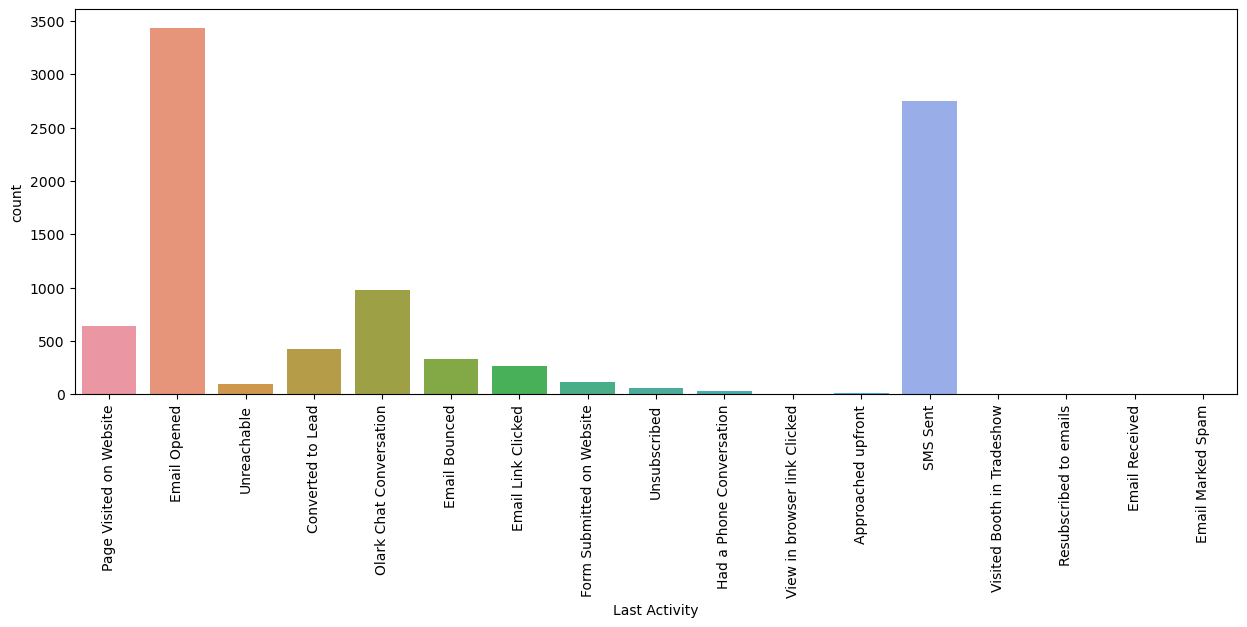

In [25]:
# Visualisation

plt.figure(figsize=(15, 5))
sns.countplot(x='Last Activity', data=dfm1)
plt.xticks(rotation=90)
plt.show()

In [26]:
# Imputing 'Email Opened' in Missing Values for Last Activity.
# Reason - As we do not know the last activity of leads which are missing values and most frequent value is 'Email Opened' so we can impute missing value with 'Email Opened'.

dfm1['Last Activity'] = dfm1['Last Activity'].replace(np.nan, 'NA')

In [27]:
# Analysing 'Country'

dfm1['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [28]:
# As the column does not seem relevant hence the same is being dropped.

dfm1.drop(['Country'],axis = 1, inplace = True)

In [29]:
# Analysing 'Specialization'

dfm1['Specialization'].value_counts()

NA                                   1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

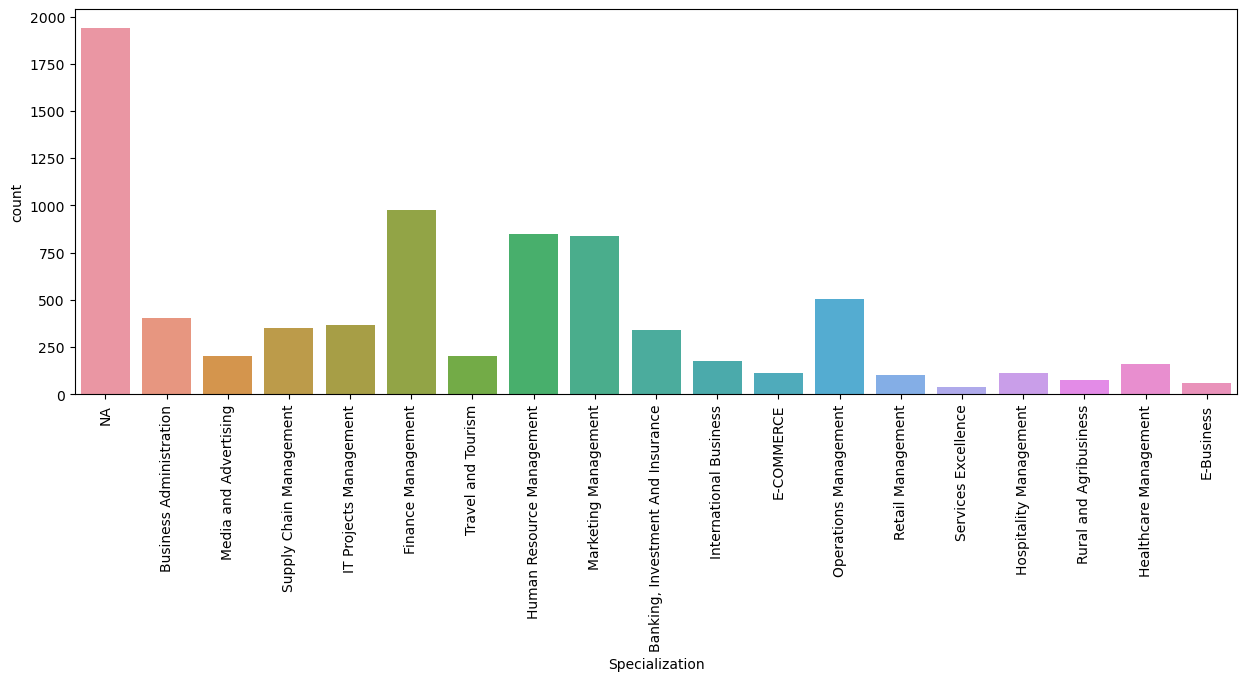

In [30]:
# Visualisation

plt.figure(figsize=(15, 5))
sns.countplot(x='Specialization', data=dfm1)
plt.xticks(rotation=90)
plt.show()

In [31]:
# Imputing the null values in the 'Specialization' with 'Not Mentioned'
# Reason - This is to inform the team that this field is not filled by most of the users.

dfm1.Specialization.fillna('NA',inplace=True)

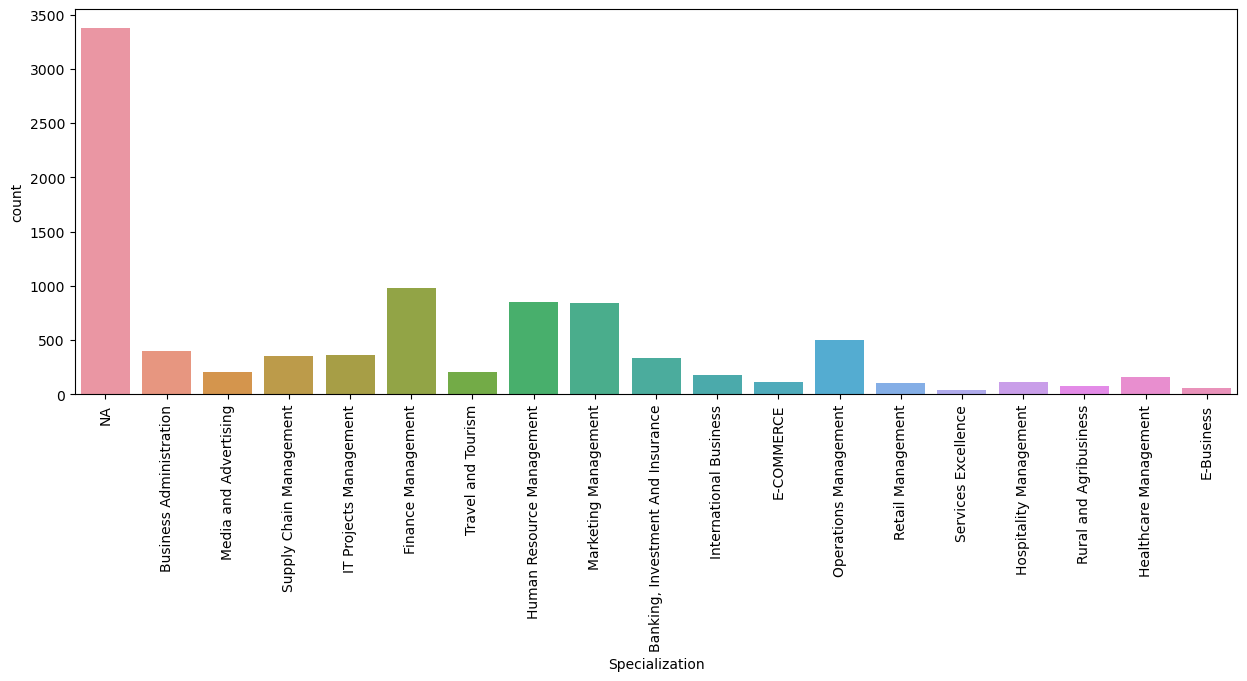

In [32]:
# Visualisation

plt.figure(figsize=(15, 5))
sns.countplot(x='Specialization', data=dfm1)
plt.xticks(rotation=90)
plt.show()

In [33]:
# Analysing 'What is your current occupation'

dfm1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

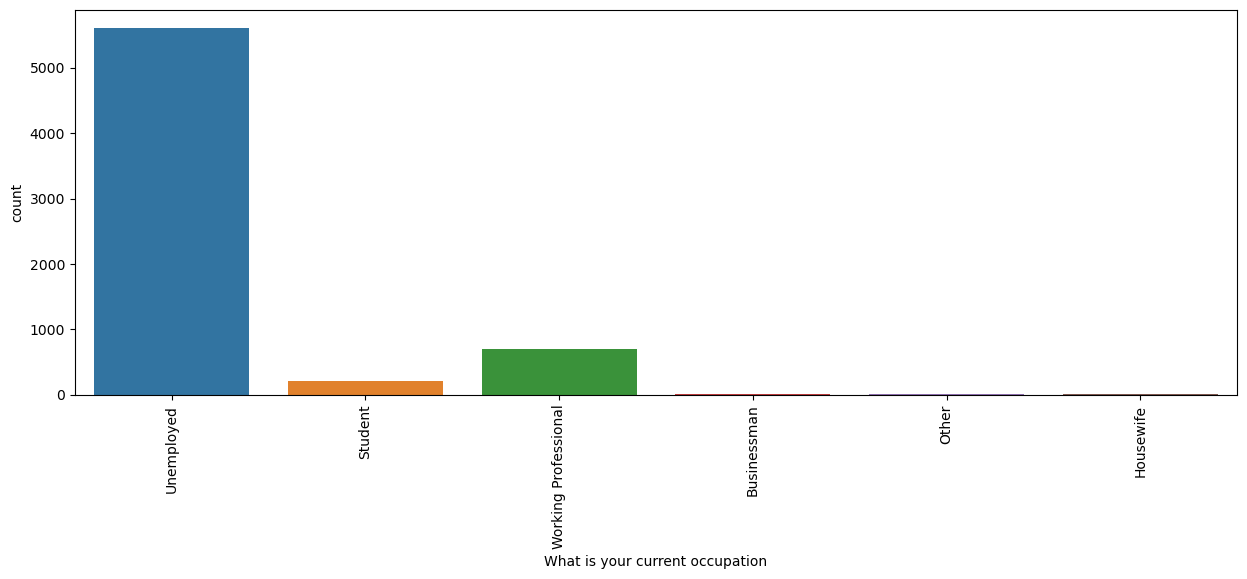

In [34]:
# Visualisation

plt.figure(figsize=(15, 5))
sns.countplot(x='What is your current occupation', data=dfm1)
plt.xticks(rotation=90)
plt.show()

In [35]:
# Imputing the null values in the 'What is your current occupation' with the mode.

dfm1['What is your current occupation'].fillna('NA',inplace=True)

In [36]:
# Analysing 'What matters most to you in choosing a course'

dfm1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

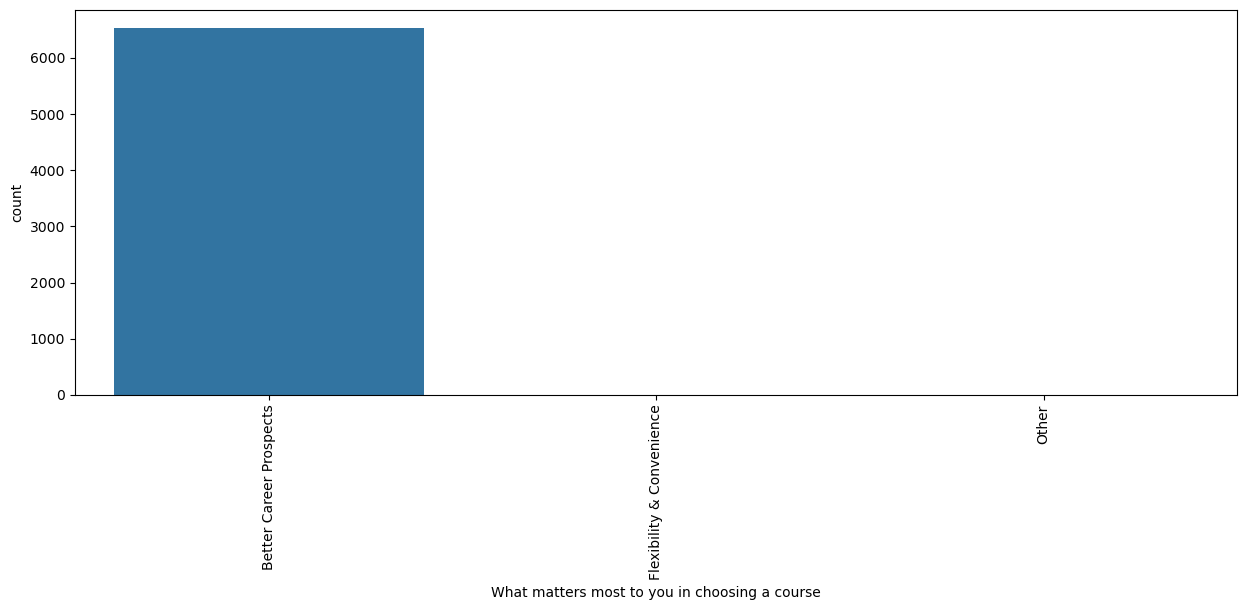

In [37]:
# Visualisation

plt.figure(figsize=(15, 5))
sns.countplot(x='What matters most to you in choosing a course', data=dfm1)
plt.xticks(rotation=90)
plt.show()

In [38]:
# Imputing the null values in the 'What matters most to you in choosing a course' with the mode.

dfm1['What matters most to you in choosing a course'].fillna('NA',inplace=True)

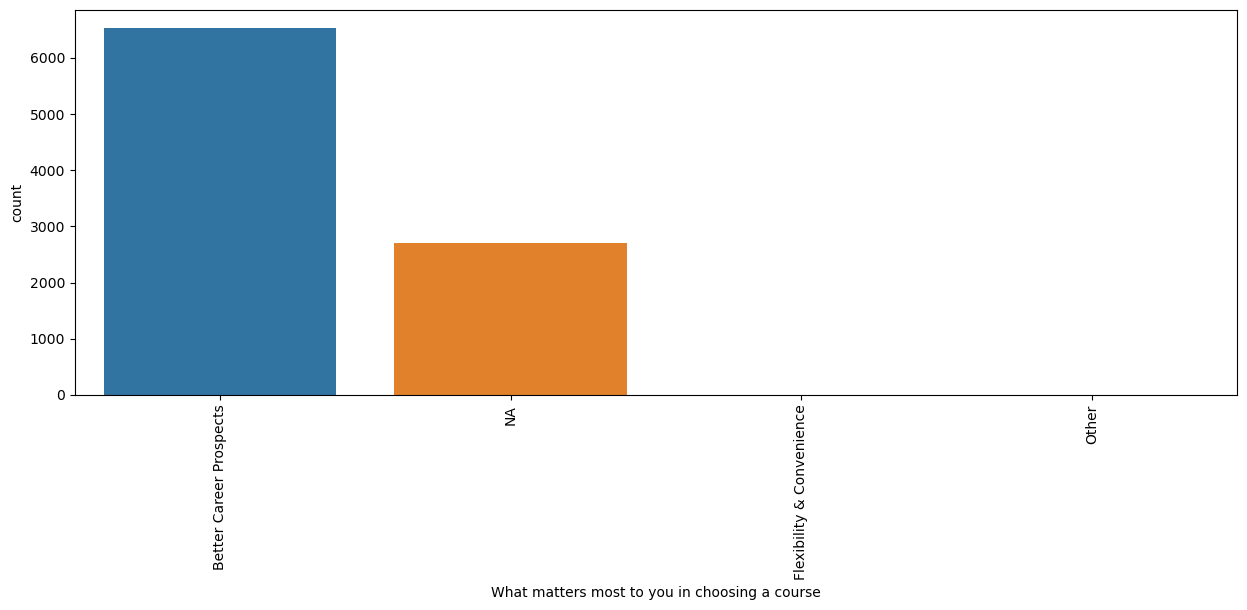

In [39]:
# Visualisation

plt.figure(figsize=(15, 5))
sns.countplot(x='What matters most to you in choosing a course', data=dfm1)
plt.xticks(rotation=90)
plt.show()

In [40]:
# Analysing 'Tags'

dfm1['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [41]:
# As the column does not seem relevant hence the same is being dropped.

dfm1.drop(['Tags'],axis = 1, inplace = True)

In [42]:
# Analysing 'City'

dfm1['City'].value_counts()

Mumbai                         3222
NA                             2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
# As the column does not seem relevant hence the same is being dropped.

dfm1.drop(['City'],axis = 1, inplace = True)

In [44]:
# Checking value counts of 'Lead Source':-

dfm1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [45]:
# Replace all instances of 'google' with 'Google' to ensure uniformity.
# Impute missing values with 'Google', as it has the highest occurrence.

dfm1['Lead Source']=dfm1['Lead Source'].replace('google','Google')
dfm1['Lead Source'].fillna(dfm1['Lead Source'].mode()[0],inplace=True)

In [46]:
dfm1['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [47]:
# Analysing 'Asymmetrique Activity Index'

dfm1.value_counts('Asymmetrique Activity Index')

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
dtype: int64

In [48]:
# Analysing 'Asymmetrique Profile Index'

dfm1.value_counts('Asymmetrique Profile Index')

Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
dtype: int64

In [49]:
# Analysing 'Asymmetrique Activity Score'

dfm1.value_counts('Asymmetrique Activity Score')

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
dtype: int64

In [50]:
# Analysing 'Asymmetrique Profile Score'

dfm1.value_counts('Asymmetrique Profile Score')

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
dtype: int64

In [51]:
# Analysing 'How did you hear about X Education'

dfm1.value_counts('How did you hear about X Education')

How did you hear about X Education
NA                       5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
dtype: int64

In [52]:
# Analysing 'Lead Profile '

dfm1.value_counts('Lead Profile')

Lead Profile
NA                             4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
dtype: int64

In [53]:
dfm1['Asymmetrique Activity Index'].fillna('NA',inplace=True)
dfm1['Asymmetrique Profile Index'].fillna('NA',inplace=True)


# Dropping the columns Asymmetriquew Activity and Profile Score as the Index Values are already recorded.
dfm1.drop(columns=['Asymmetrique Activity Score'], inplace=True)
dfm1.drop(columns=['Asymmetrique Profile Score'], inplace=True)

dfm1.drop(['How did you hear about X Education','Lead Profile'],1,inplace=True)

# Replacing the Null Values with NA as the column is relevant.
# Dropping columns 'How did you hear about X Education' and 'Lead Profile' as the data is irrelevant to the Business Problem

In [54]:
dfm1.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [55]:
# Re-checking shape of the dataframe:-

dfm1.shape

(9240, 29)

In [56]:
# Checking missing values after treating missing values:-

round(100*(dfm1.isnull().sum()/len(dfm1)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

----

### Verifying uniqueness of 'Prospect ID' and 'Lead Number' columns.

In [57]:
# Checking duplicate values in 'Prospect ID':-

dfm1.duplicated(subset = 'Prospect ID').sum()

0

In [58]:
# Checking duplicate values in 'Lead Number':-

dfm1.duplicated(subset = 'Lead Number').sum()

0

The 'Prospect ID' and 'Lead Number' columns both contain unique values, serving as identifiers for each entry. As these columns do not contribute to the predictive power of our model, they can be dropped.

In [59]:
#Dropping 'Prospect ID' and 'Lead Number' variables as they serve solely as unique identifiers.

dfm1.drop(['Prospect ID','Lead Number'],1,inplace=True)

### <font color = green> After cleaning the data, we have ensured there are no missing values in the Dataframe. 
### <font color = green> Now, we can proceed with further analysis.

----

## <font color = brown> 4. Exploratory Data Analysis (EDA)

### Univariate Analysis

<font color='blue'>As per problem statement 'Converted' is our target variable.</font>

The target variable. Indicates whether a lead has been successfully converted or not.
- 0: Not converted into lead.
- 1: Lead has been successfully Converted.

In [60]:
# Calculating the conversion rate

Converted = (sum(dfm1['Converted'])/len(dfm1['Converted'].index))*100
Converted

38.53896103896104

In [61]:
#Checking Distribution of 'TARGET' Variable

converted_counts = dfm1['Converted'].value_counts()

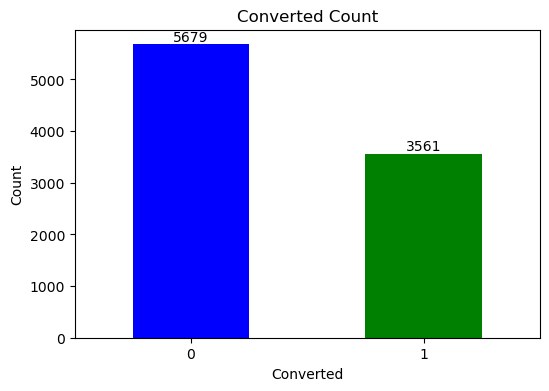

In [62]:
#Plotting count plot to get clear view of data distribution of 'Converted' column:-

plt.figure(figsize=(6, 4))
bars = converted_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Converted Count')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Adding annotations
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [63]:
#Checking ratio of imbalance:-

(dfm1.Converted==1).sum()/(dfm1.Converted==0).sum()

0.6270470153195985

### Observation

As we can see that the imbalance ratio is not high, hence we can say that the data is effeciently balanced.

In [64]:
# Again checking data types of remaining columns:-

dfm1.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                                         object
Digital Advertisement          

In [65]:
# Analyzing Categorical Columns

obj_cols = dfm1.loc[:,dfm1.dtypes == 'object']
obj_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

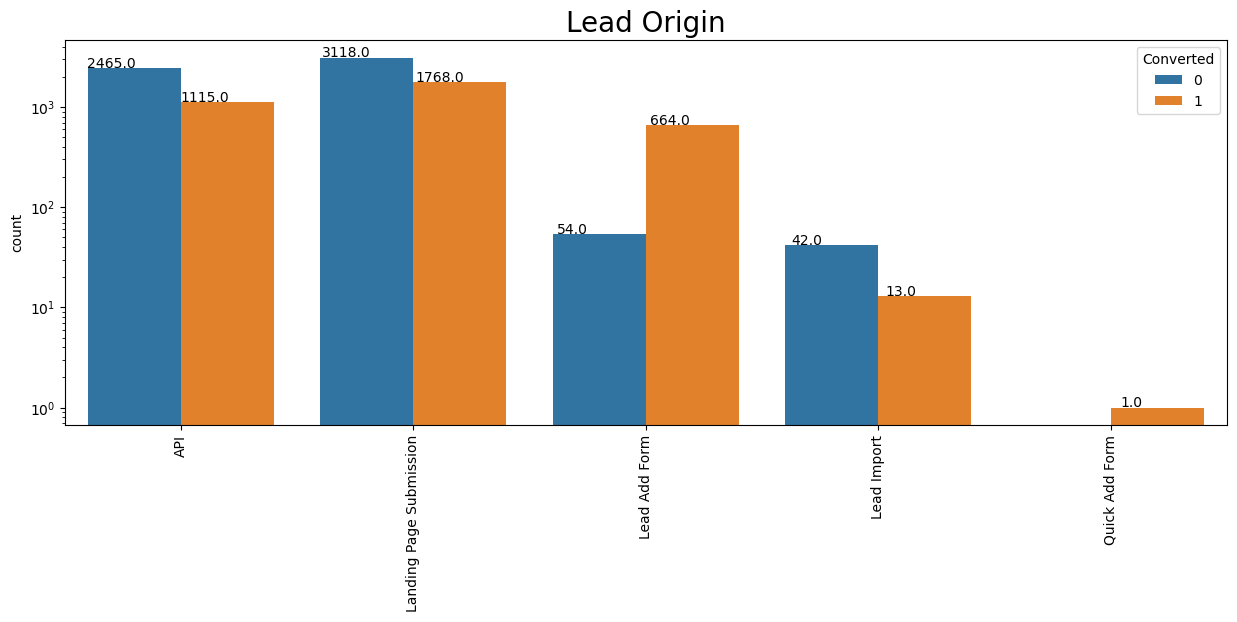

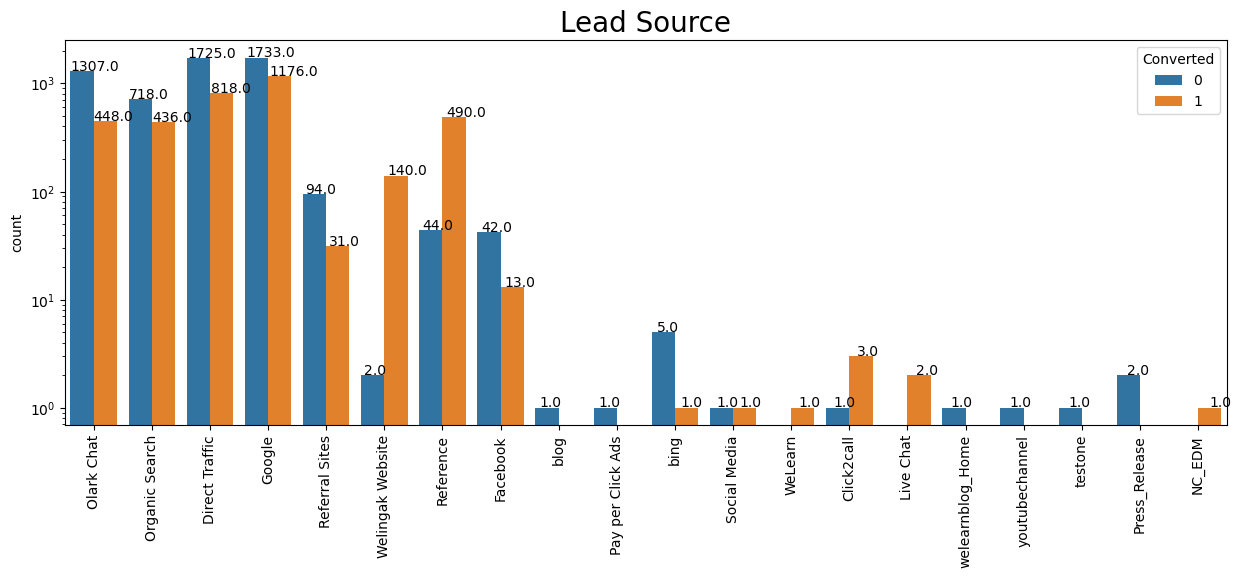

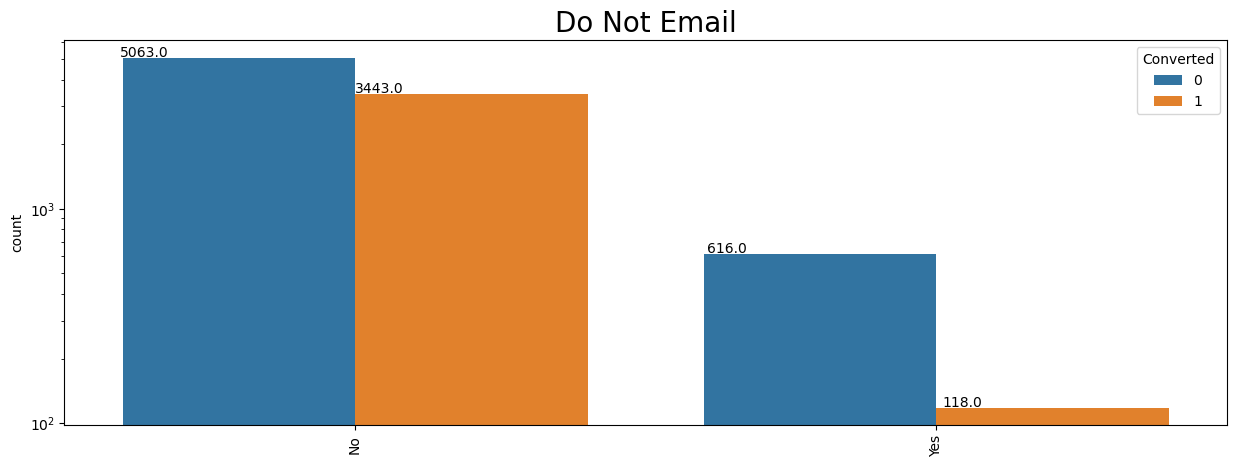

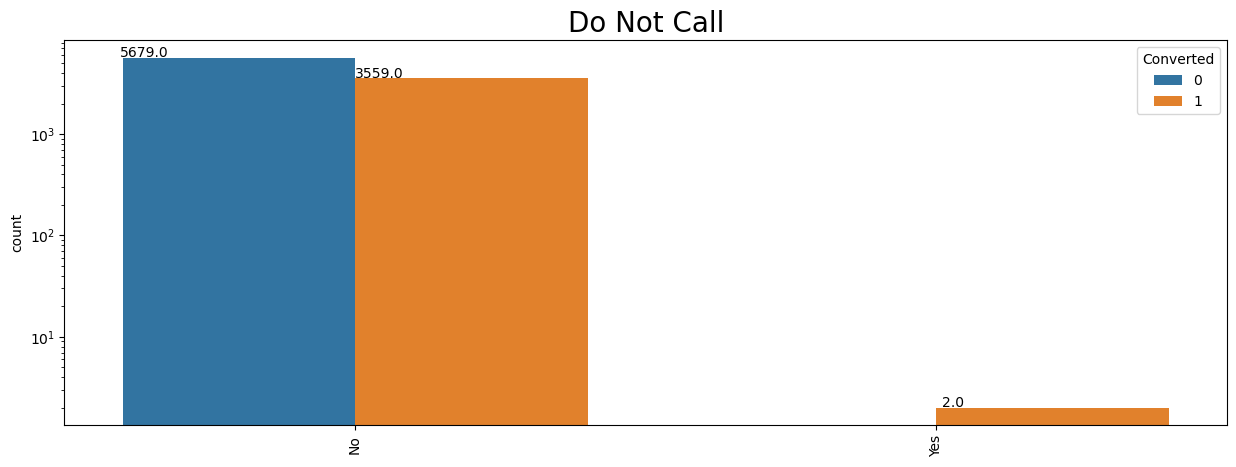

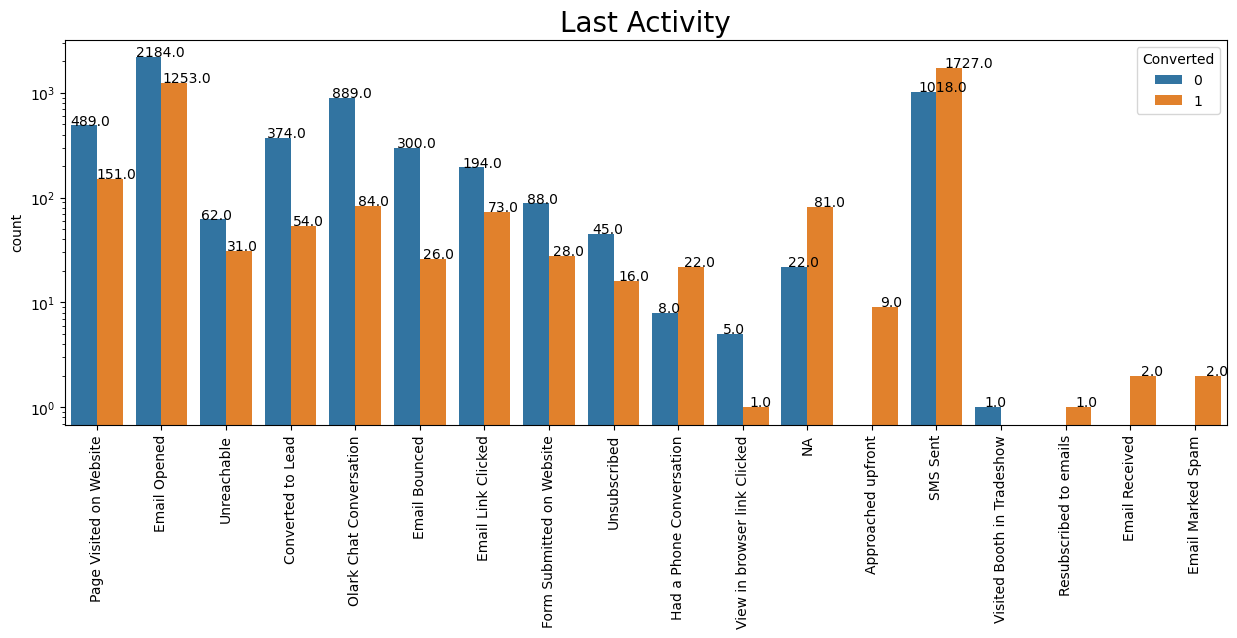

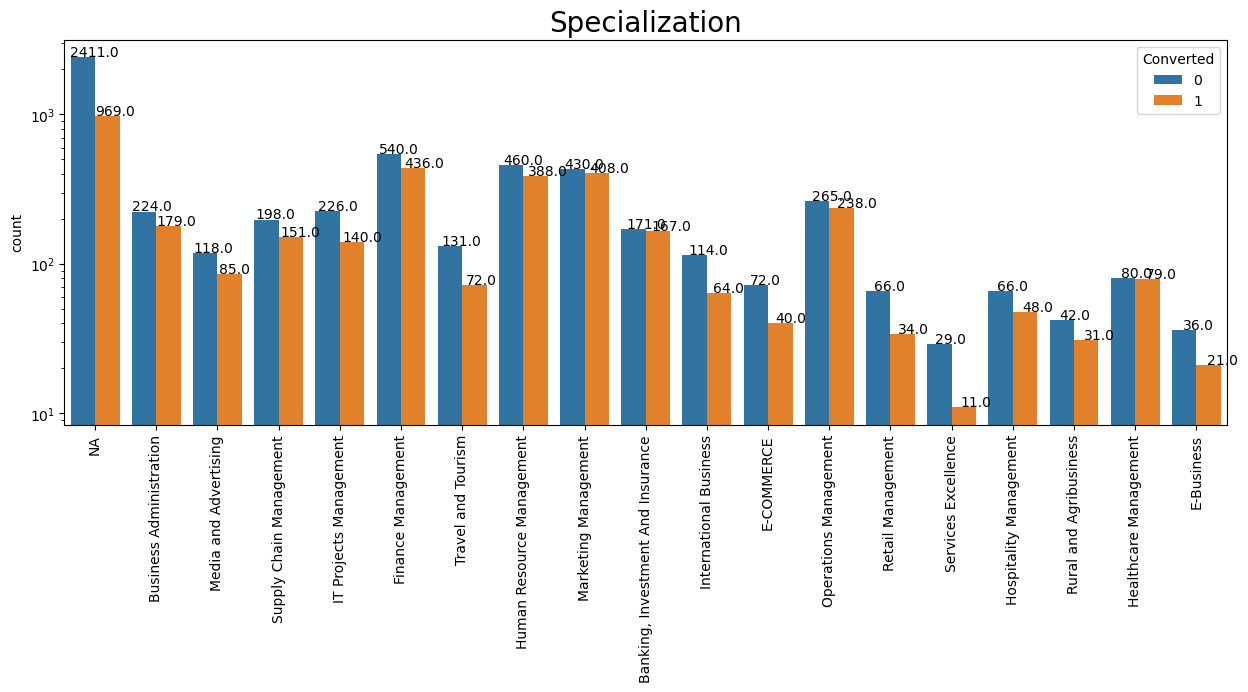

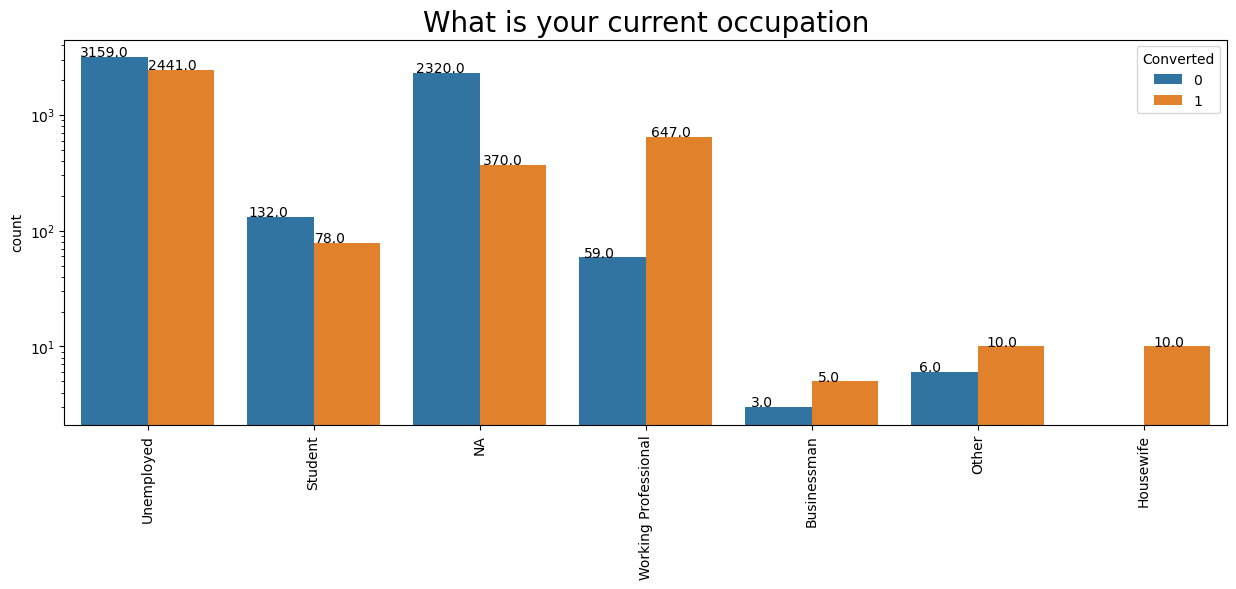

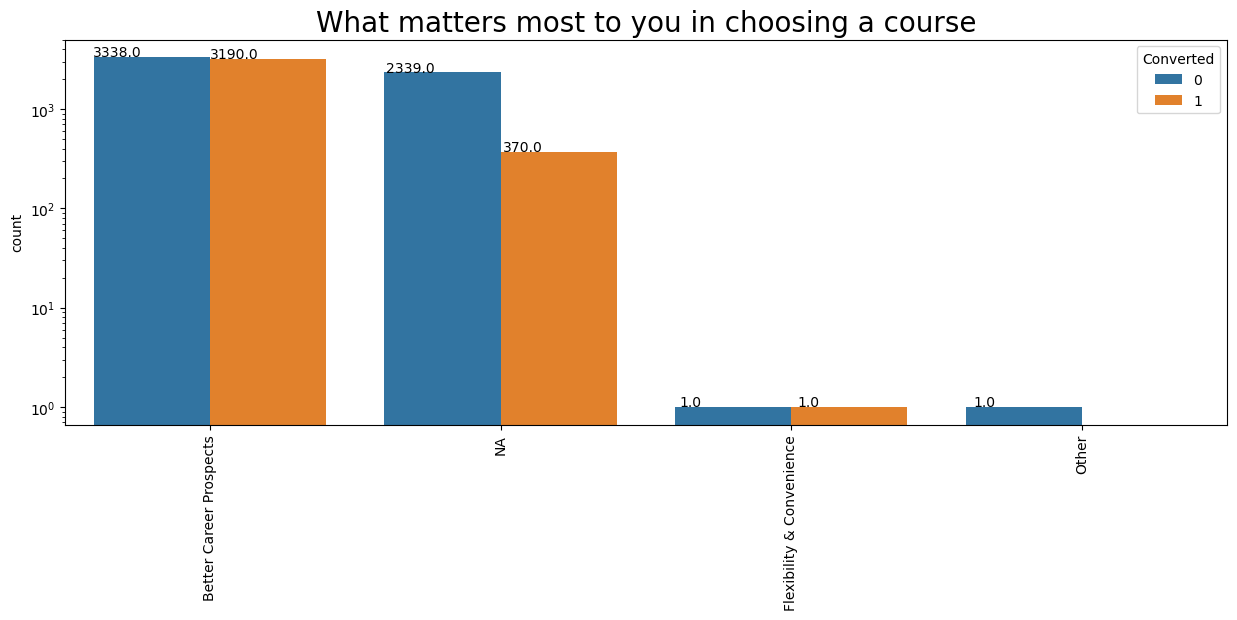

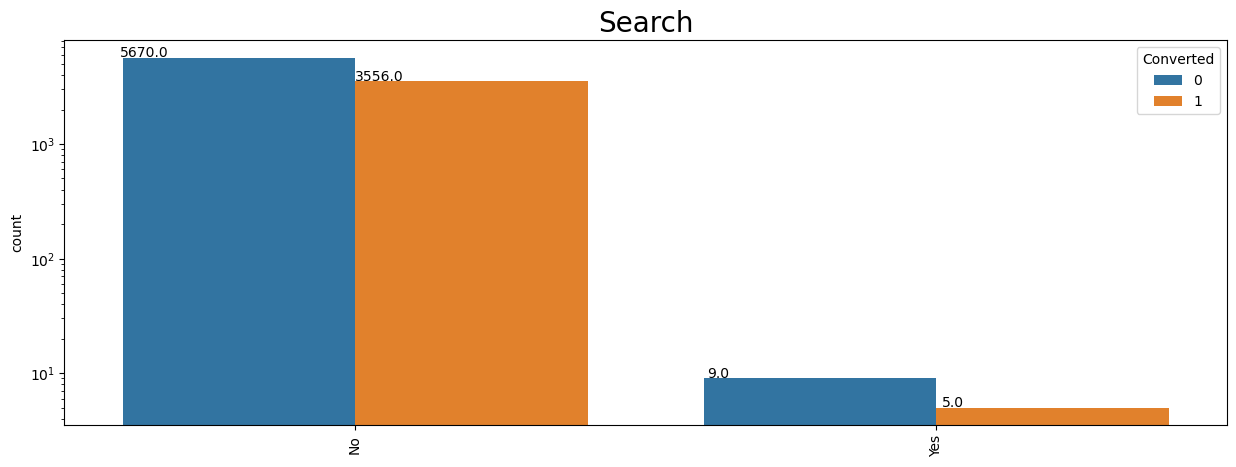

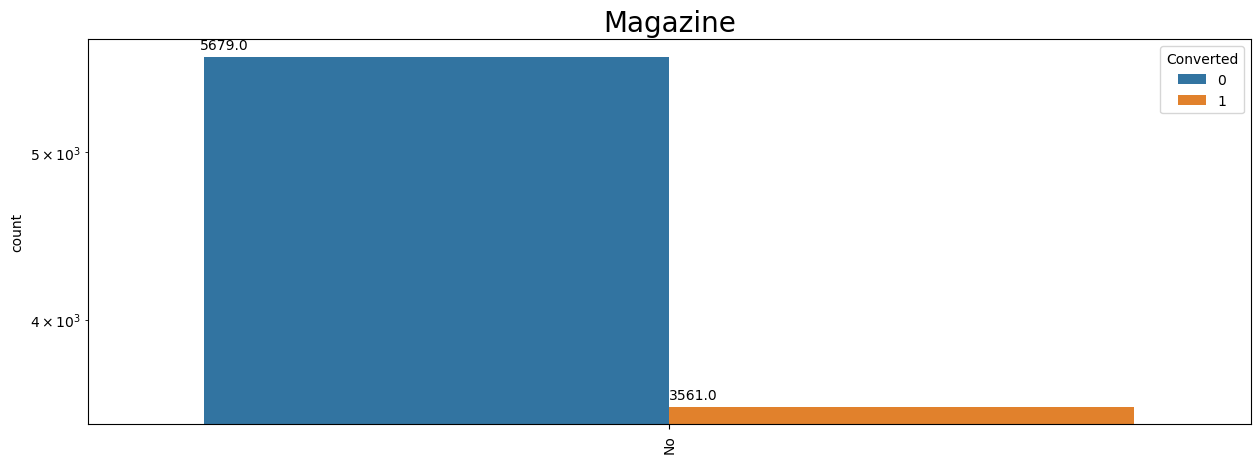

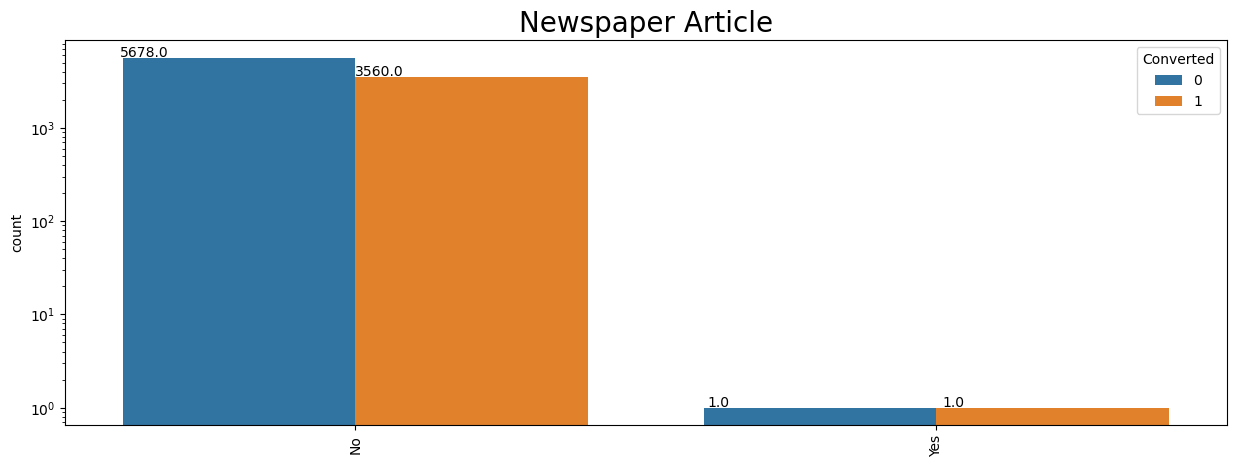

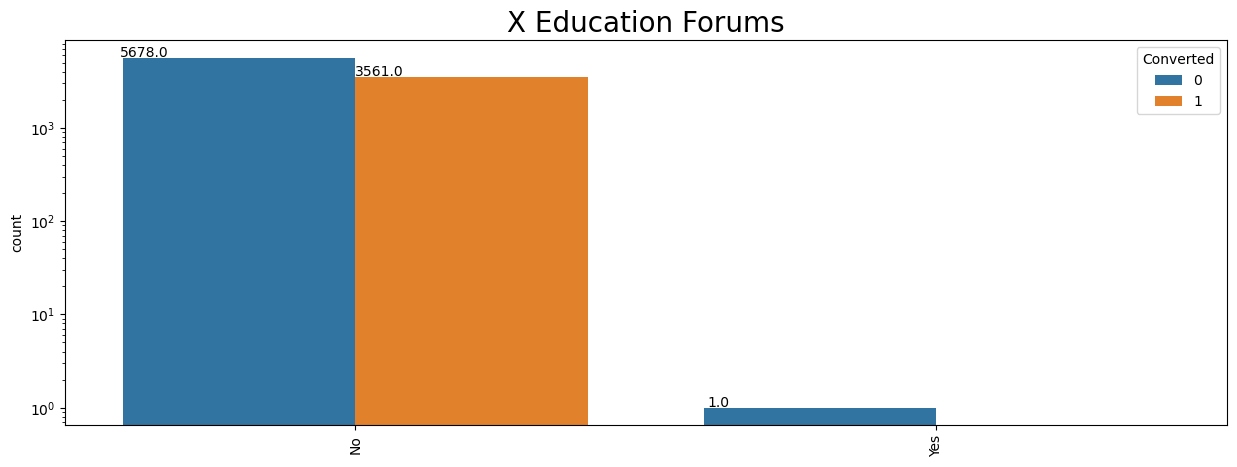

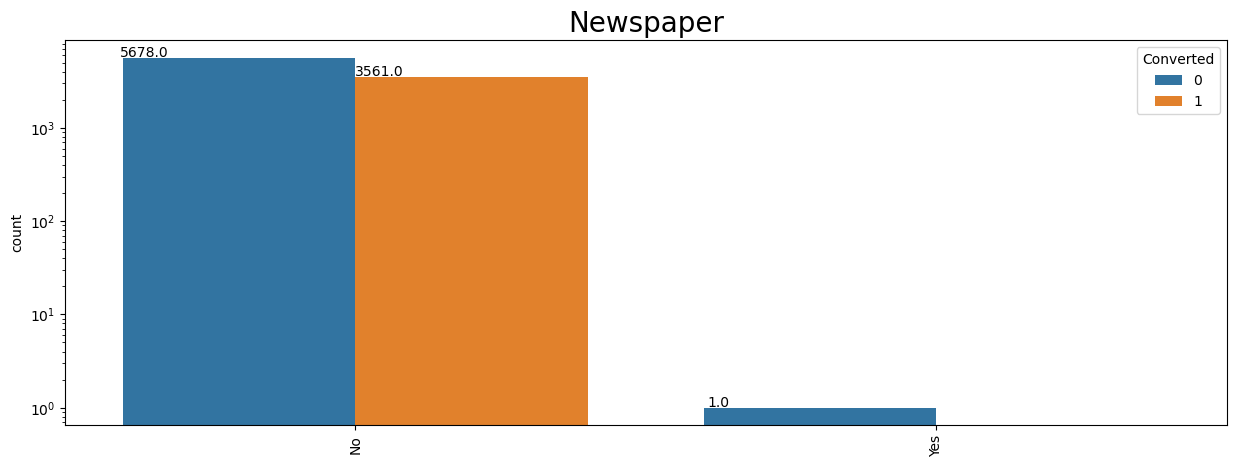

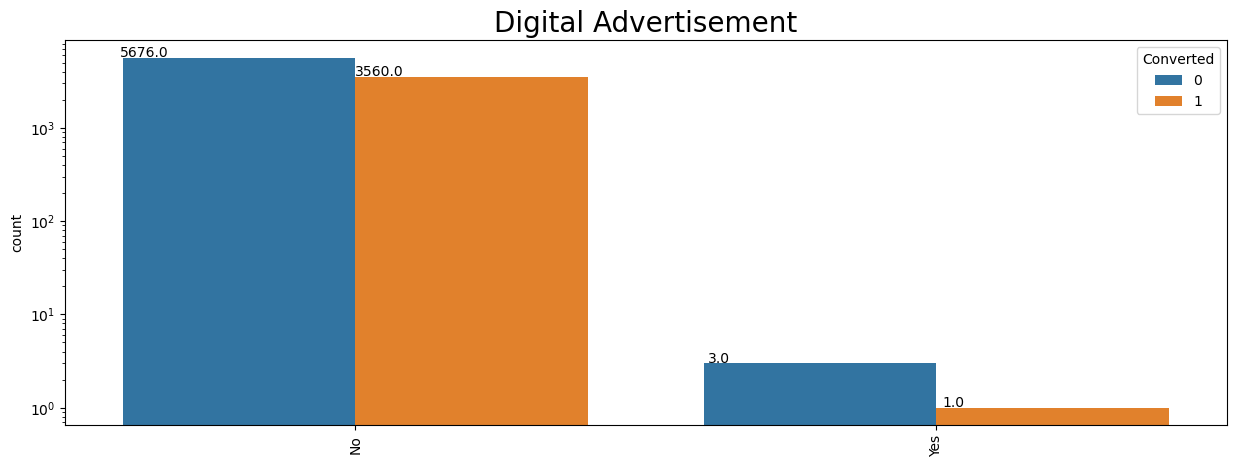

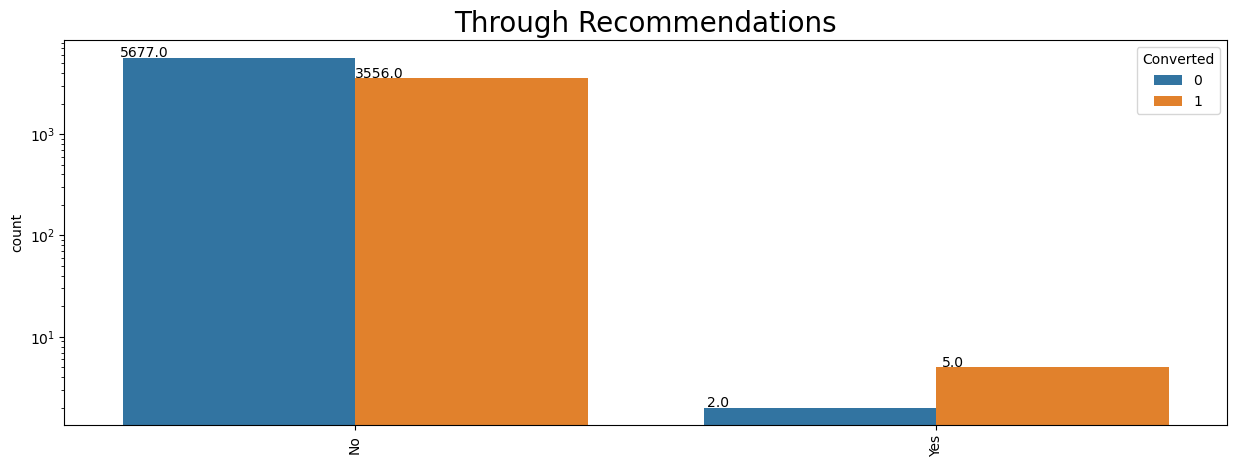

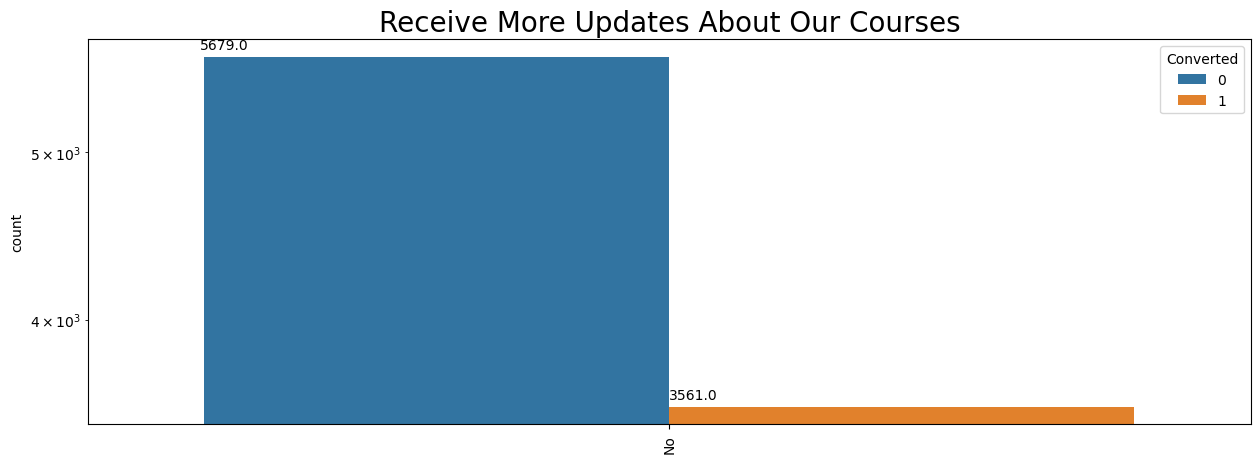

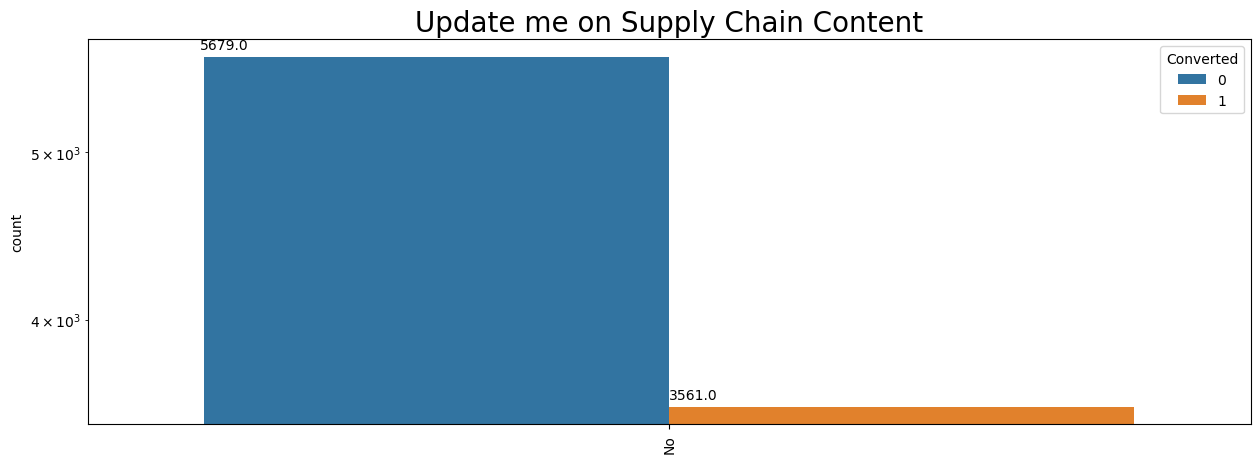

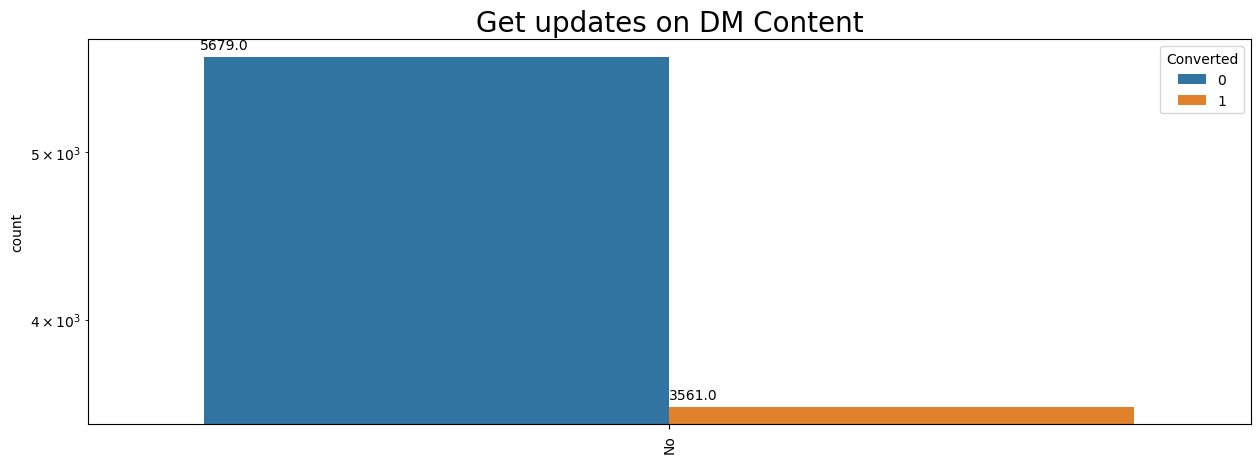

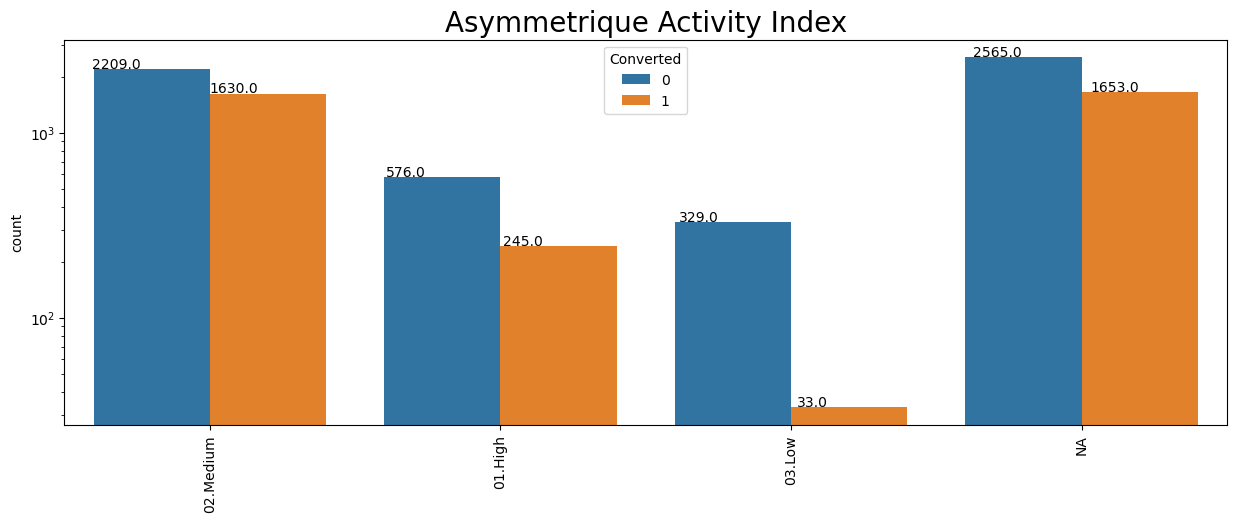

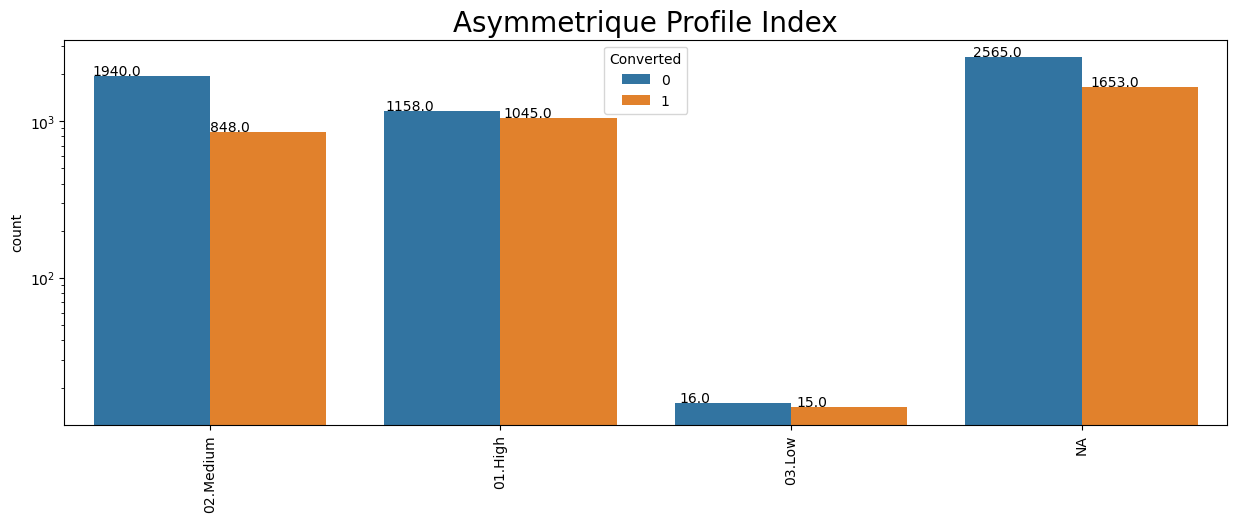

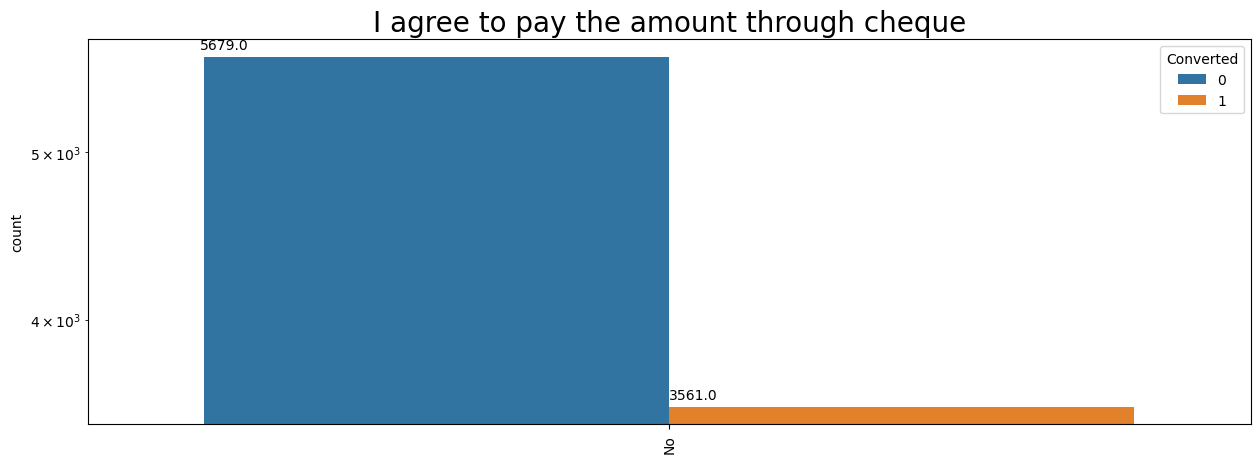

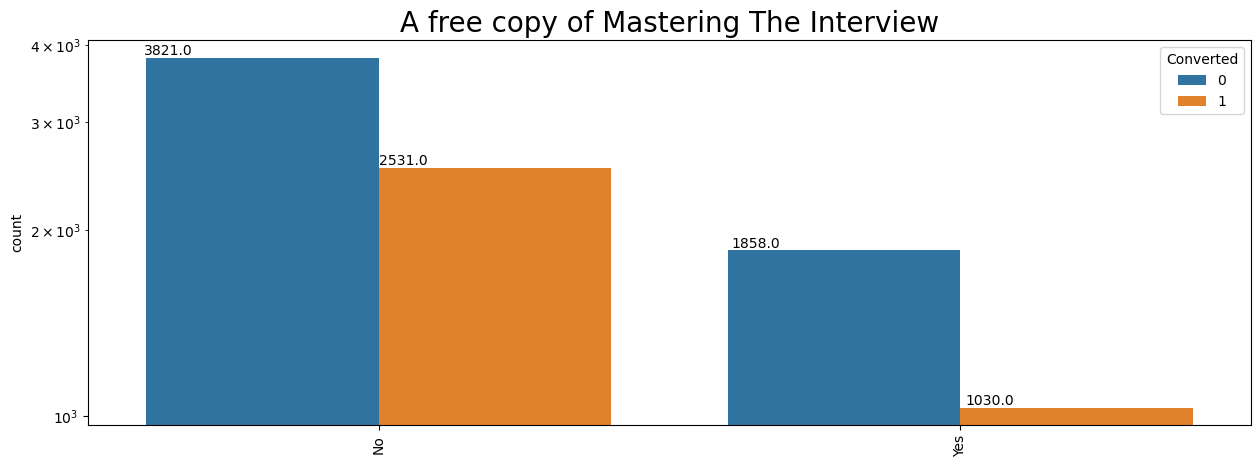

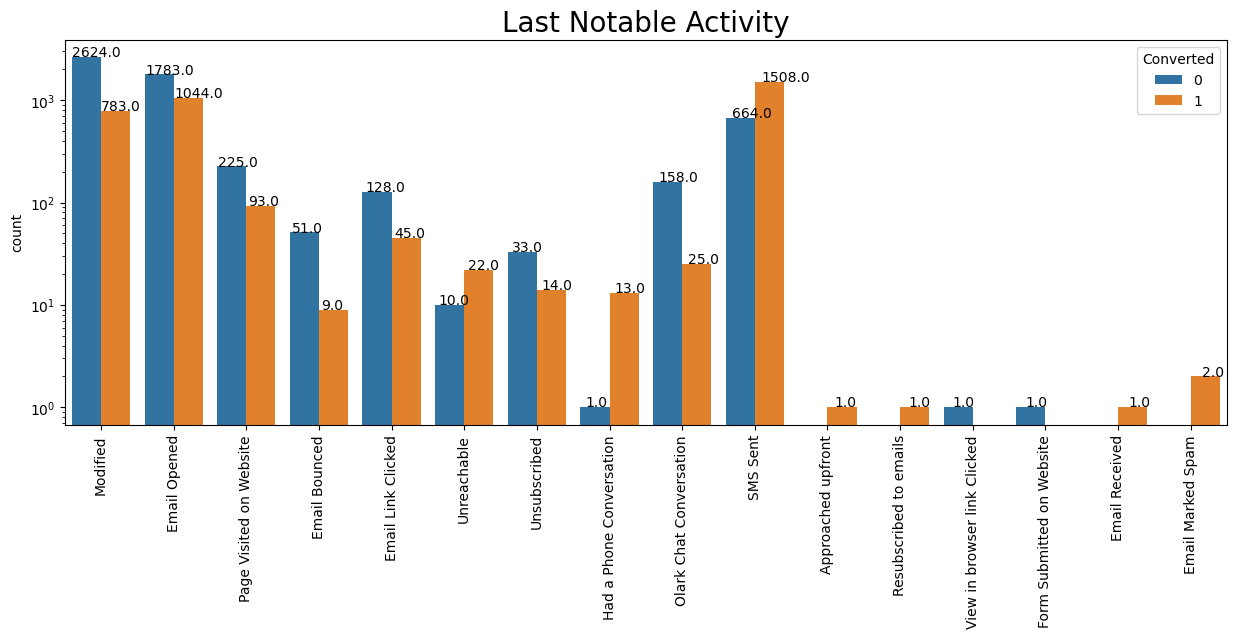

In [67]:
# Plotting count plot of all features for both 'Converted' 0 and 1 :-
for i in obj_cols:
    plt.figure(figsize = (15,5))

    ax=sns.countplot(x = i, hue = "Converted", data = dfm1)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel=None)

    plt.xticks(rotation = 90)
    plt.title(i,fontsize=20)
    ax.set_yscale('log') # Setting logrithmic scale

    plt.show()

In [68]:
# Combining all low frequency values together:-

dfm1['Lead Source'] = dfm1['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

dfm1['Last Activity'] = dfm1['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

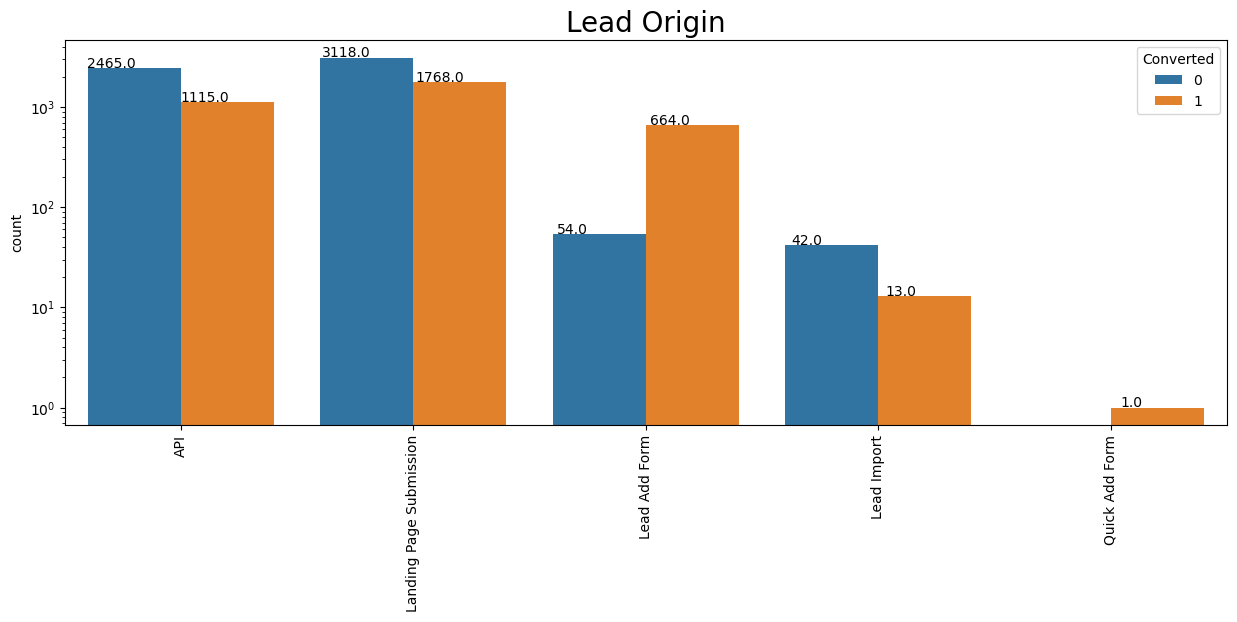

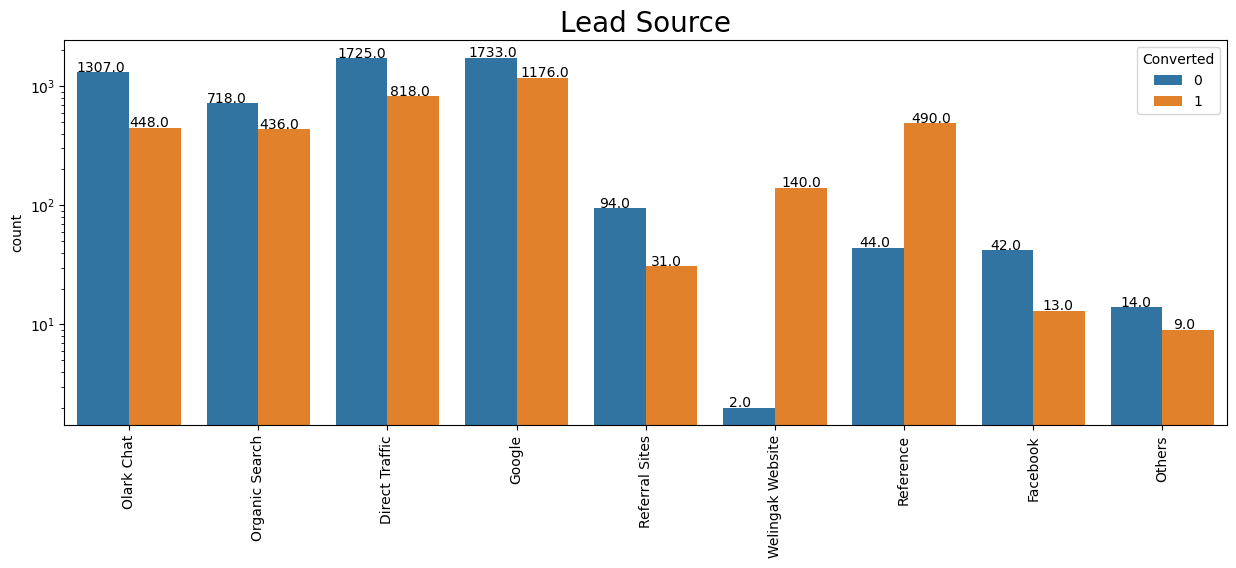

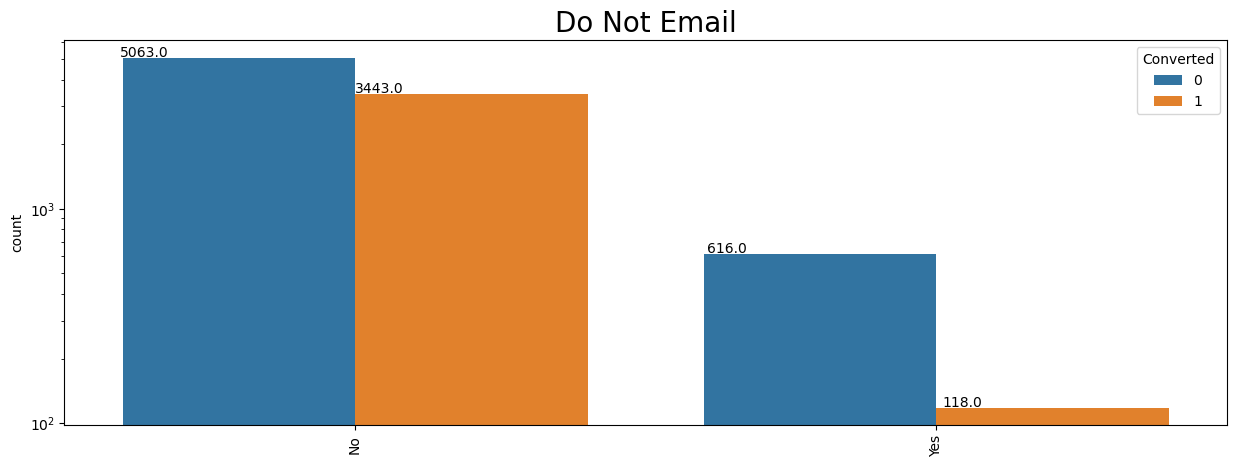

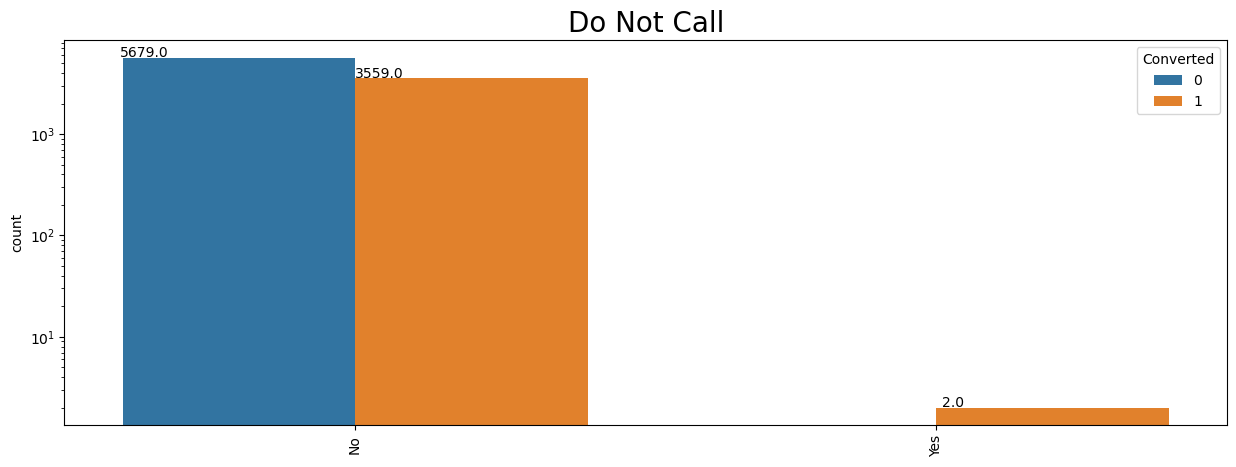

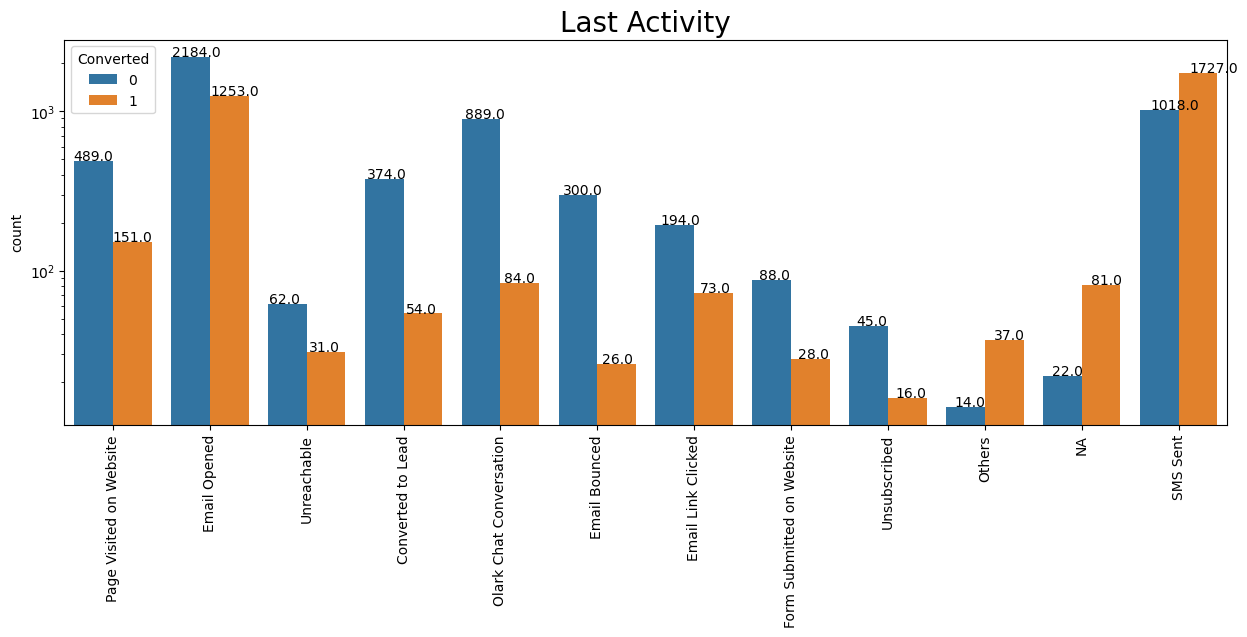

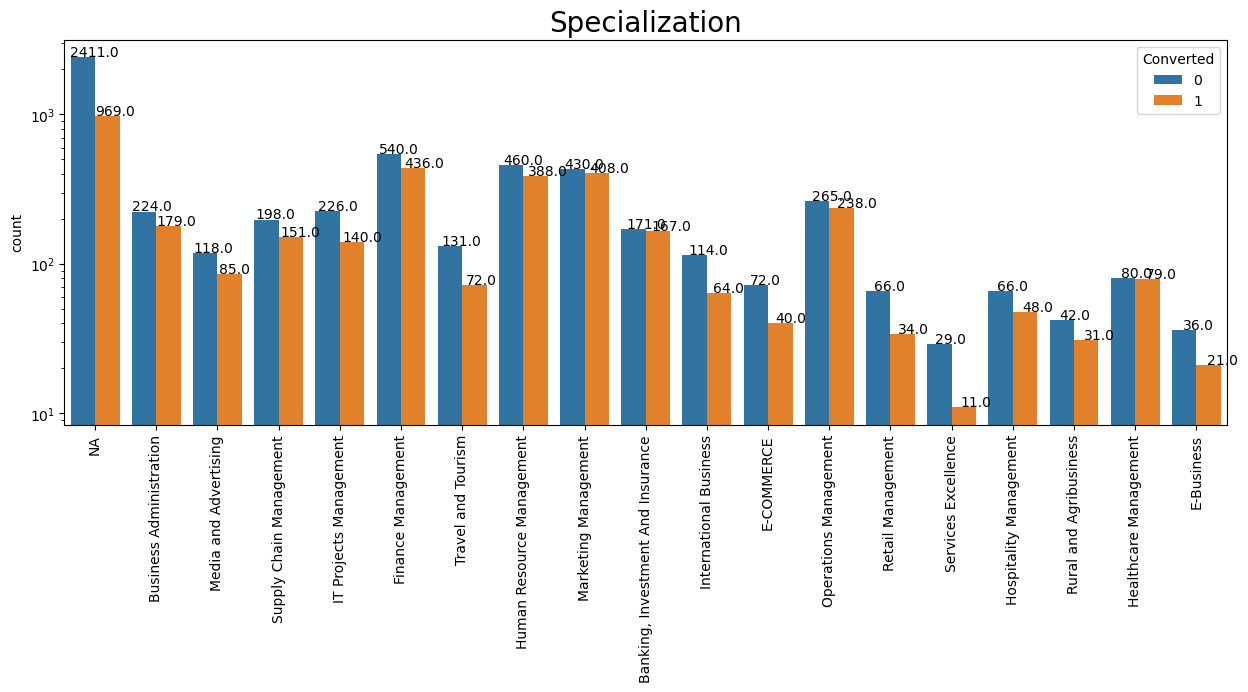

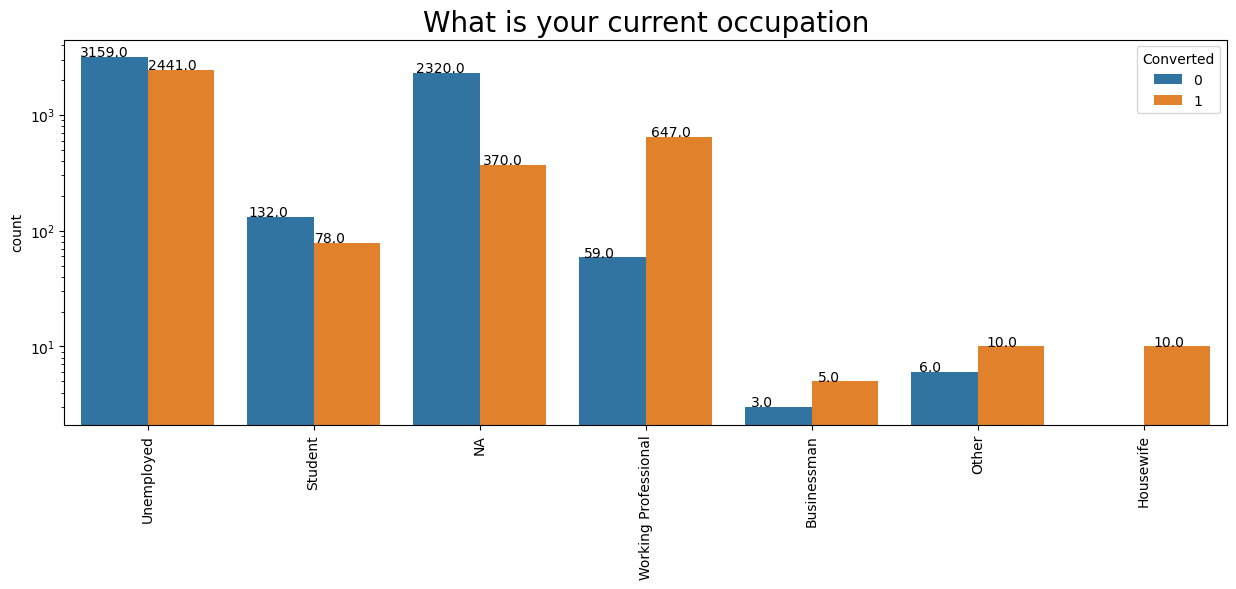

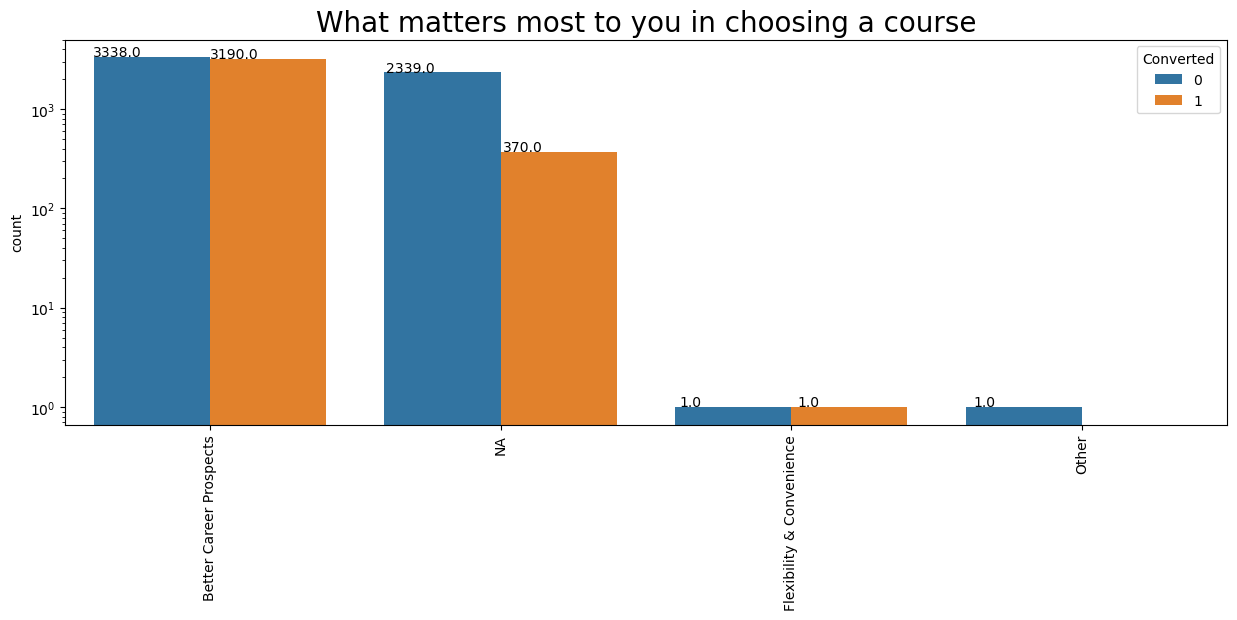

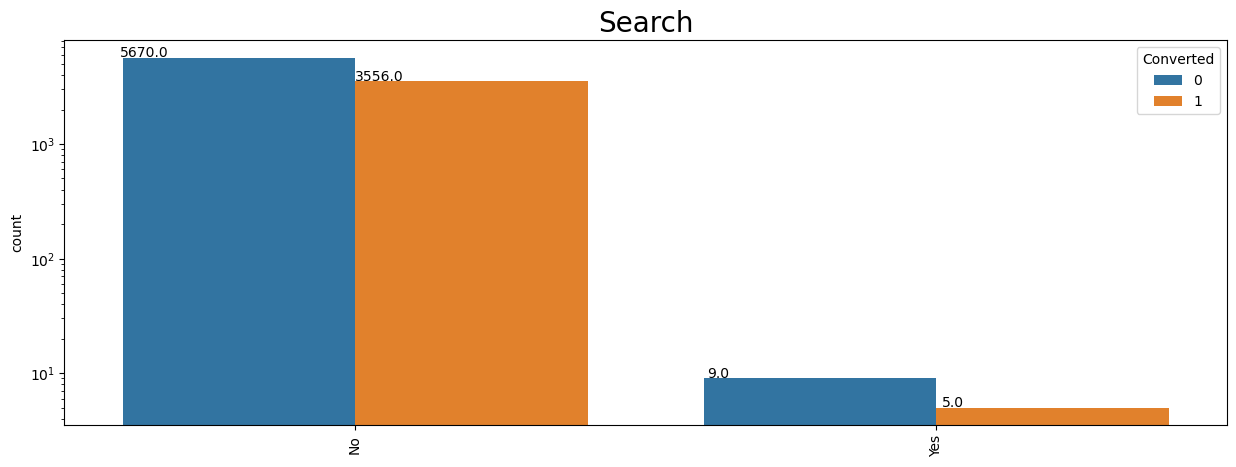

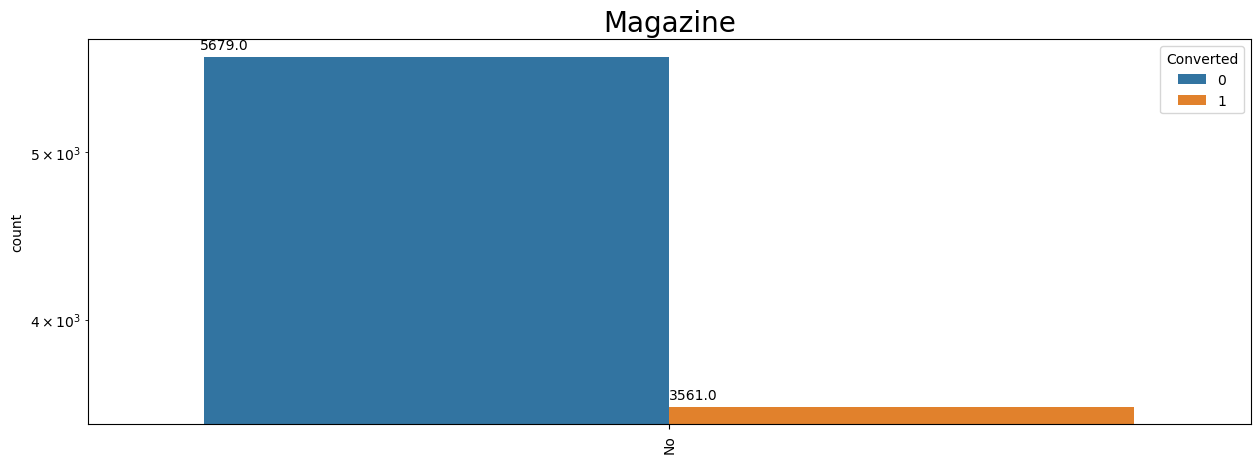

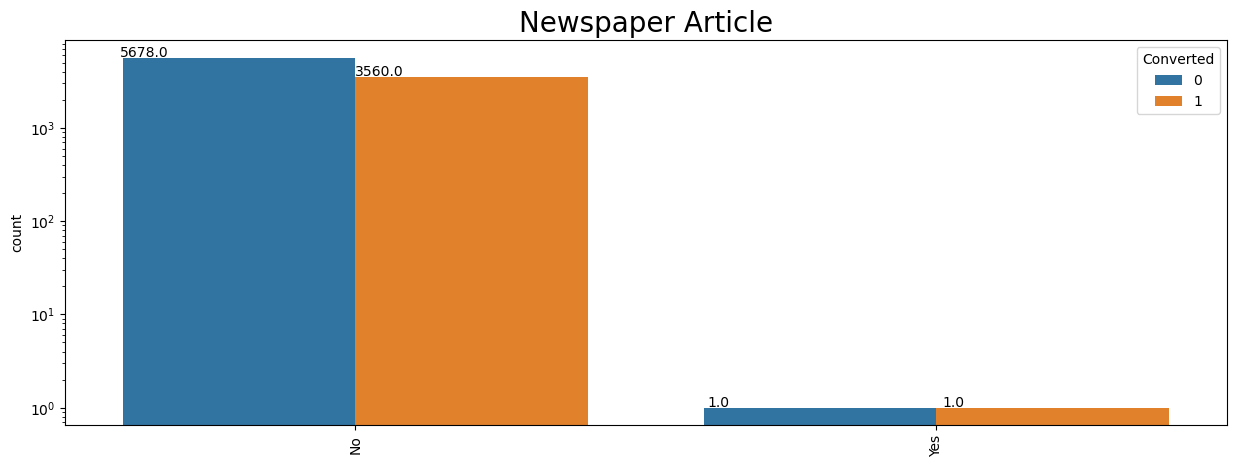

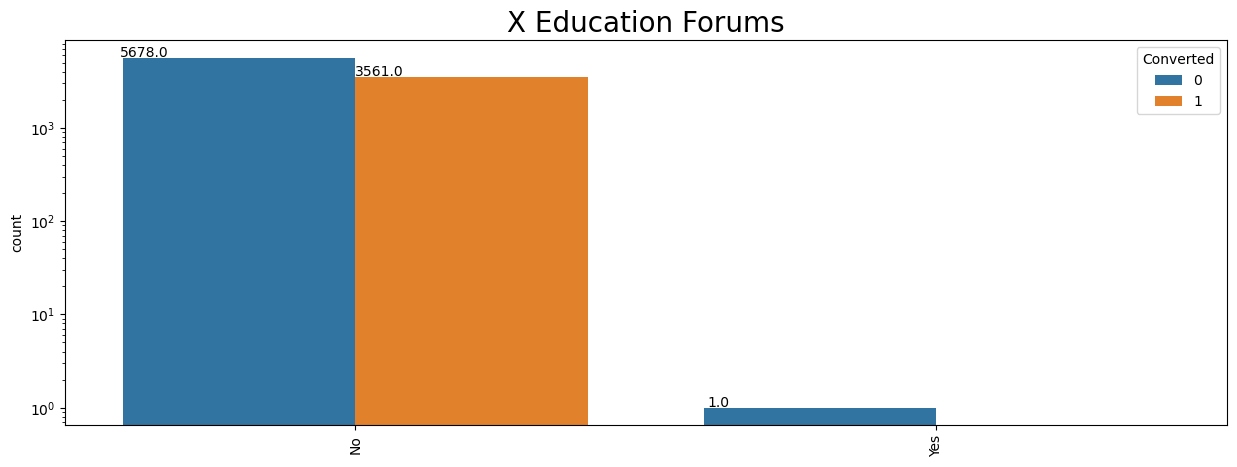

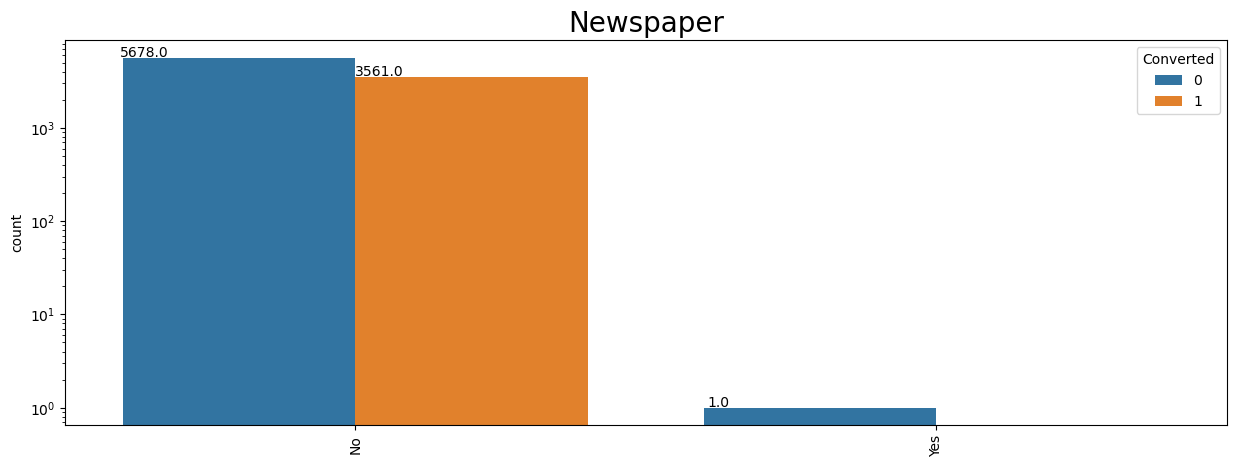

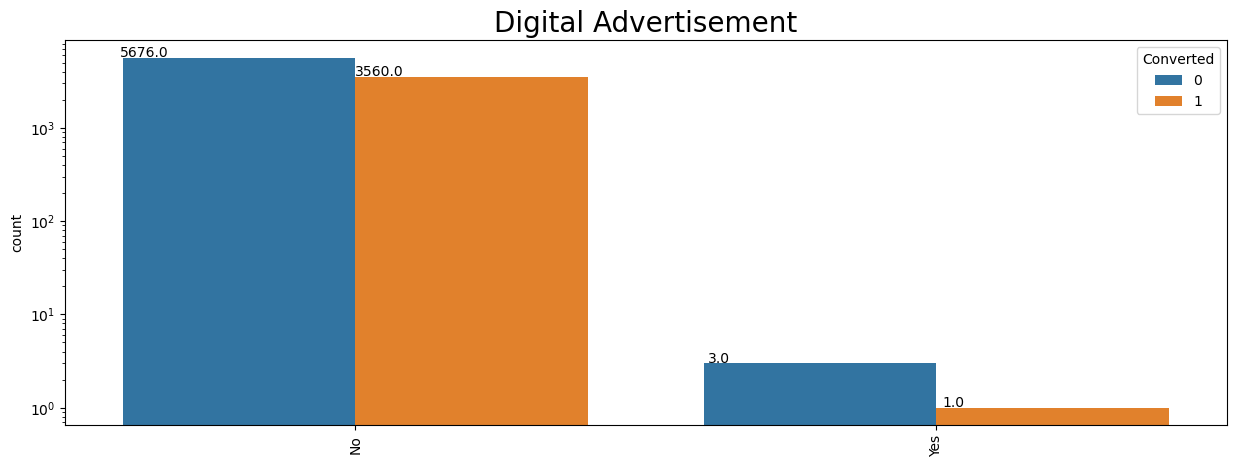

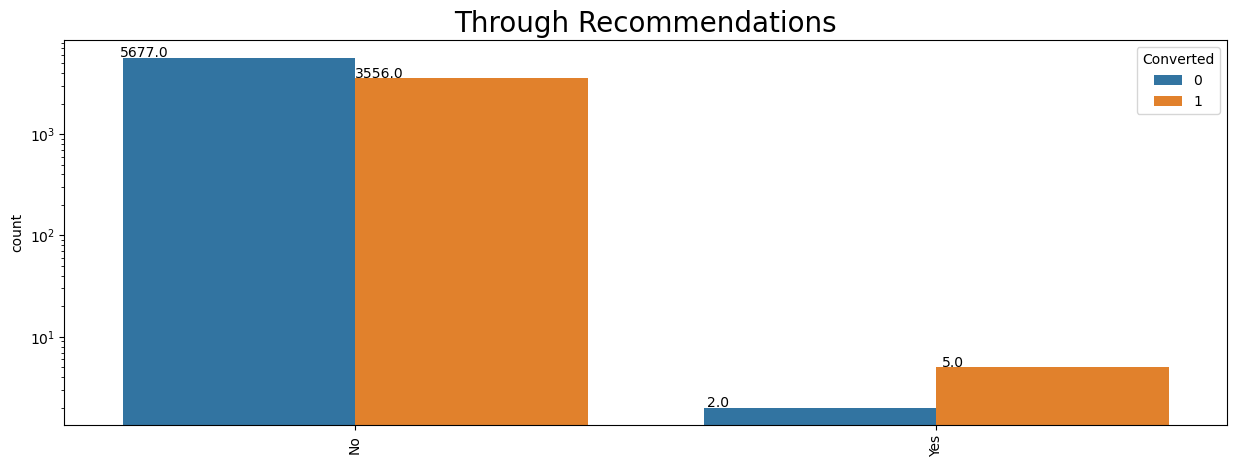

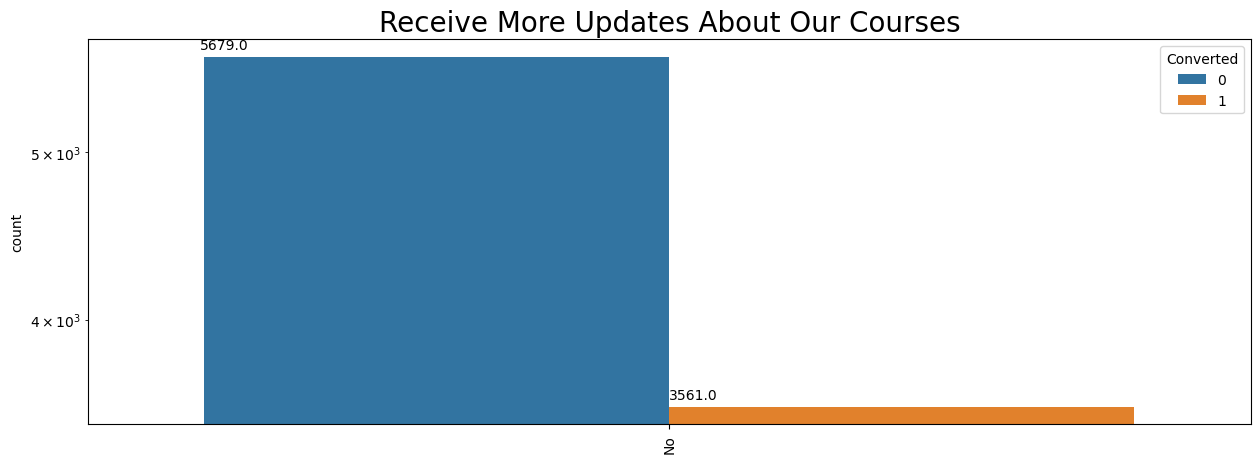

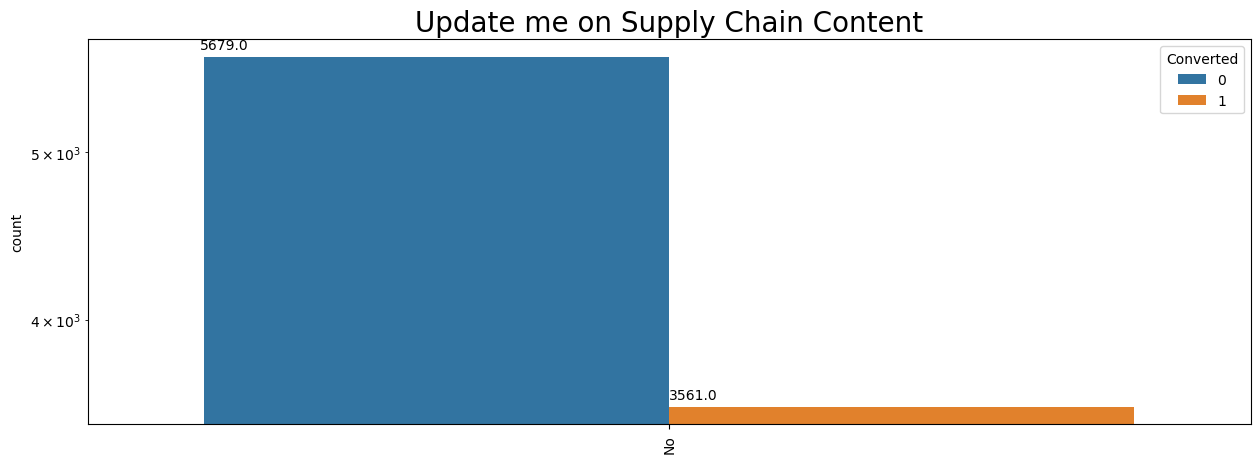

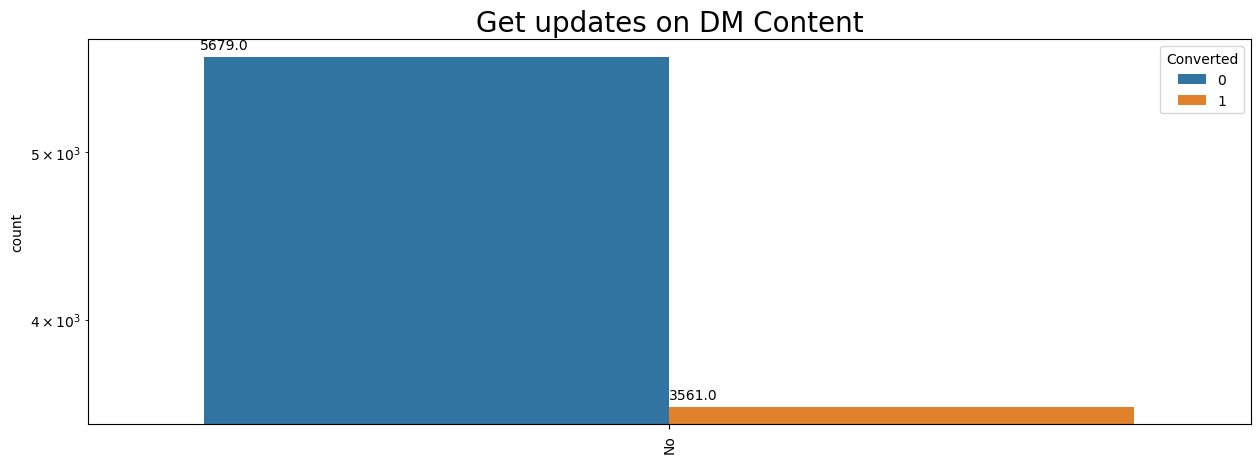

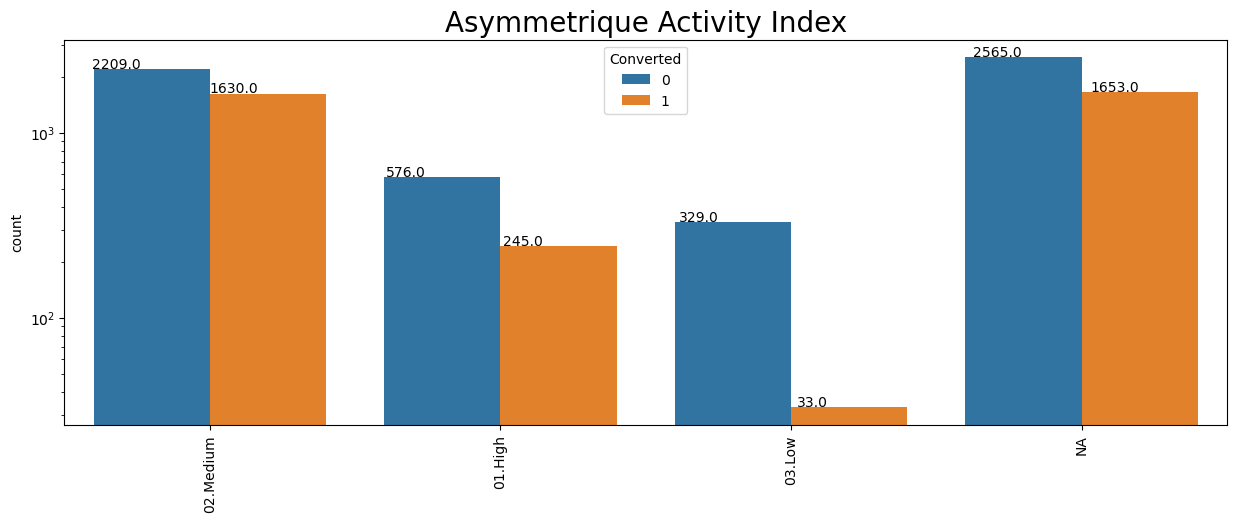

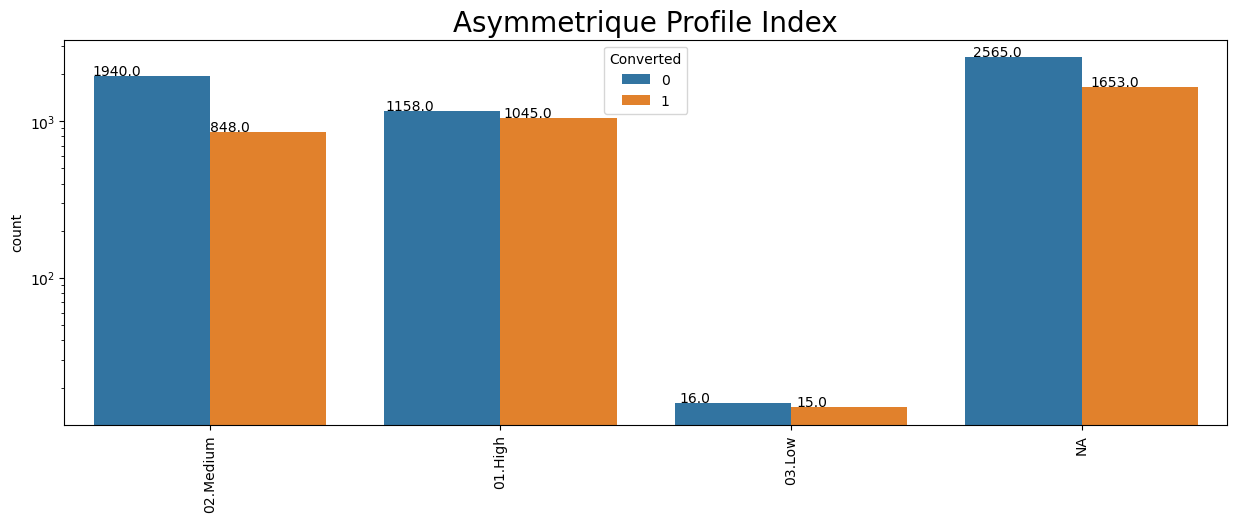

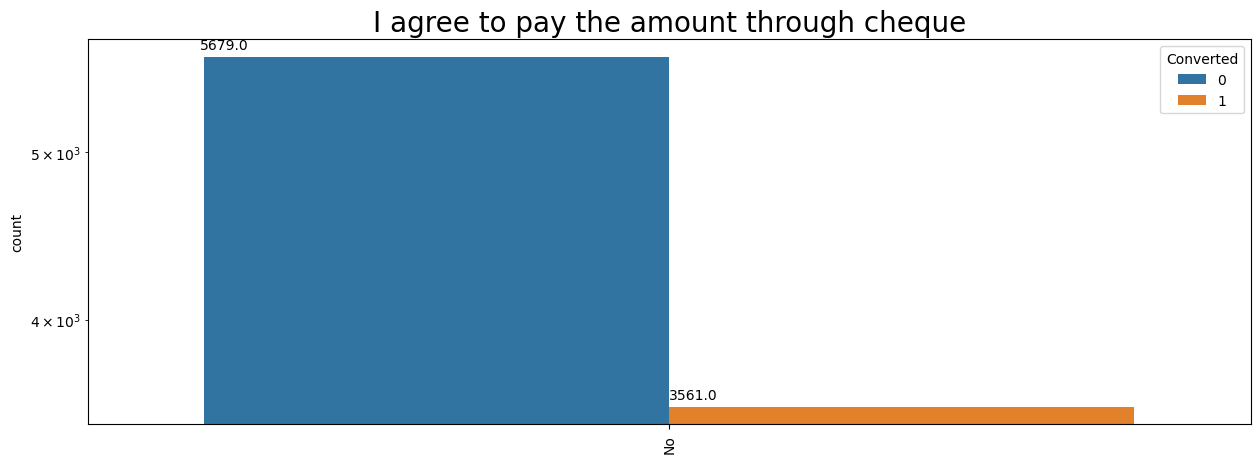

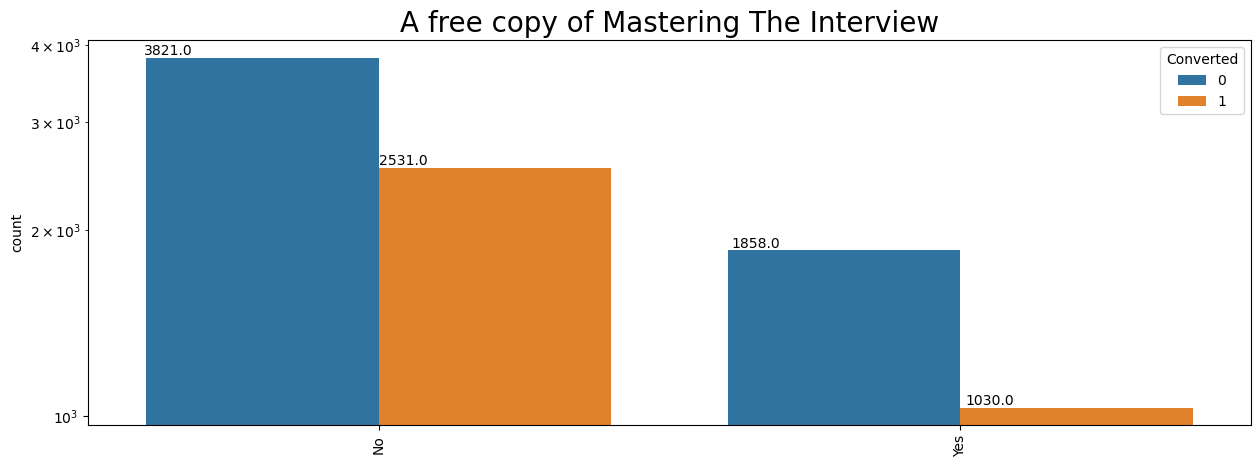

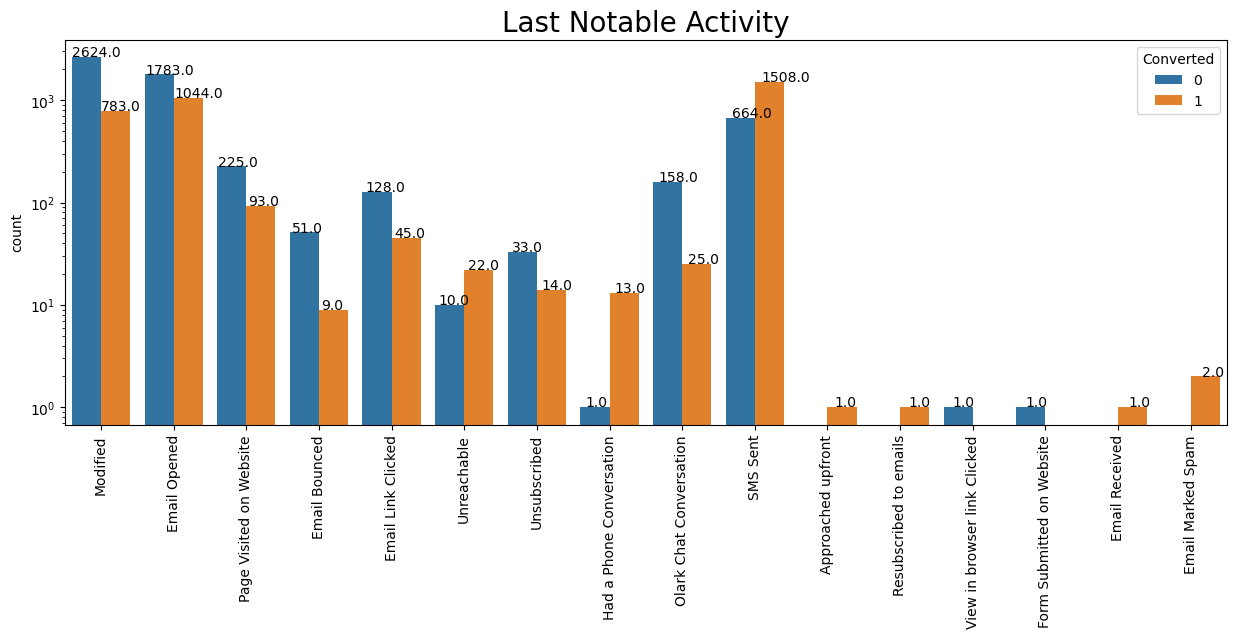

In [69]:
# Plotting count plot for all Categorical Columns for both 'Converted' 0 and 1 after making necesarry changes - 
for i in obj_cols:
    plt.figure(figsize = (15,5))

    ax=sns.countplot(x = i, hue = "Converted", data = dfm1)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel=None)

    plt.xticks(rotation = 90)
    plt.title(i,fontsize=20)
    ax.set_yscale('log') # Setting logrithmic scale

    plt.show()

### Observations

1. **Lead Sources:**
   - **Top Generators:** Google and Direct traffic.
   - **High Conversion Rates:** 'Reference' and 'Welingak Website'.
<br>
2. **Lead Origin:**
   - **API Conversion Rate:** ~31%.
   - **Landing Page Submission Conversion Rate:** ~36%.
   - **Lead Add Form:** More successful conversions than unsuccessful.
   - **Lead Import:** Low count.
<br>
3. **Contact Method:**
   - **Mail Option:** People opting for mail are becoming more leads.
<br>
4. **Last Activity:**
   - **SMS Sent:** ~63% conversion rate.
   - **Email Opened:** Most common last activity.
<br>
5. **Occupation:**
   - **Unemployed Leads:** Generate more leads and have a ~45% conversion rate.
   - **Working Professionals:** Higher conversion rate.
<br>
6. **Specialization:**
   - **Management:** Generates the most leads.
   - **Other Category:** Also generates a significant number of leads.
<br>
---

### Recommendations

1. **Enhance Conversion:**
- **Key Channels:** Focus on improving conversions for Olark Chat, Organic Search, Direct Traffic, and Google leads.
- **API and Landing Page:** Analyze and enhance factors affecting low conversion rates and optimize user experience and follow-up processes.

2. **Increase High-Performing Leads:**
- **Reference and Welingak Website:** Generate more leads from these sources.

3. **Leverage Successful Methods:**
- **Lead Add Form:** Capitalize on its higher conversion success and drive more traffic to it with optimized marketing strategies.

4. **Utilize Mail Option:**
- Focus on encouraging the mail option, as it generates more leads.
---

Implementing these strategies will help boost the overall lead conversion rate.

In [70]:
dfm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

In [71]:
# Analyzing Numerical/Continuous Columns

num_cols = dfm1.select_dtypes(include=['float64', 'int64'])
list(num_cols.columns)

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

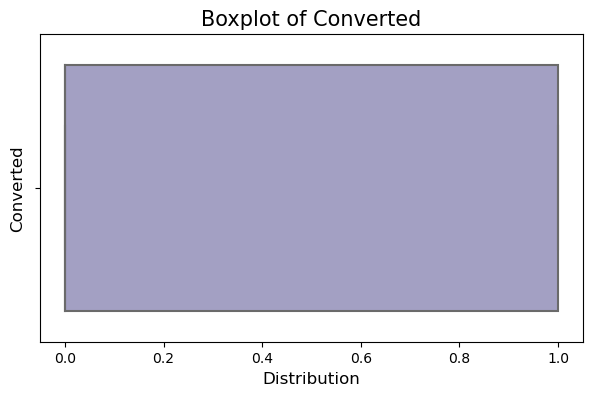

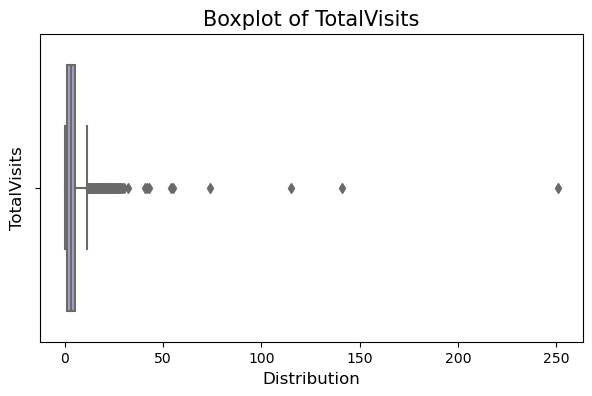

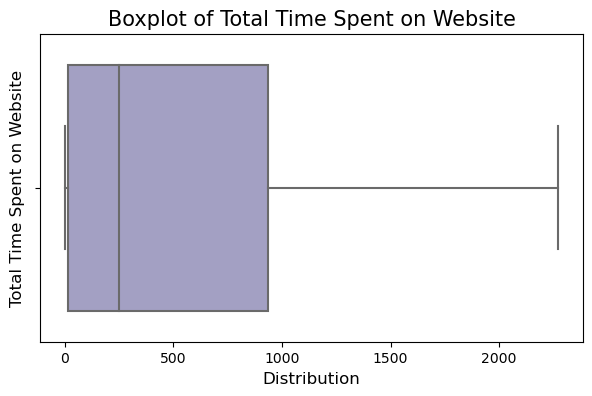

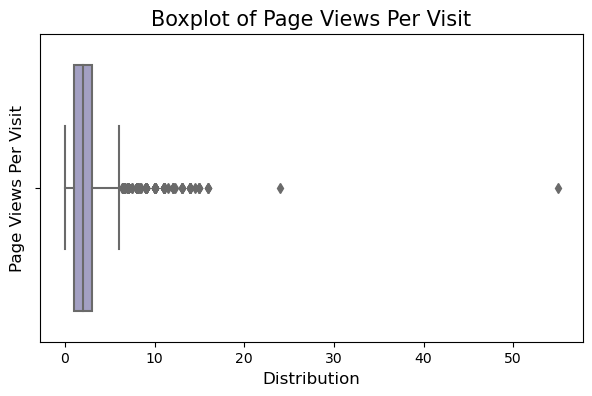

In [72]:
# Plotting count plot for all Numerical Columns for both 'Converted' 0 and 1 :-

for col in num_cols.columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=col, data=dfm1, orient='v', palette='Purples_r')
    plt.title(f'Boxplot of {col}', fontsize=15)
    plt.ylabel(col, fontsize=12)
    plt.xlabel('Distribution', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

### Observations
    - In the boxplot for 'TotalVisits' there are upper range outliers to be treated.
    - In the boxplot for 'Page Views Per Visit' there are upper range outliers to be treated.

In [73]:
# Removing Outliers

Q3_TotaVisits = dfm.TotalVisits.quantile(0.99)
dfm1 = dfm1[(dfm1['TotalVisits'] <= Q3_TotaVisits)]

Q3_PageViews = dfm1['Page Views Per Visit'].quantile(0.99) 
dfm1 = dfm1[(dfm1['Page Views Per Visit'] <= Q3_PageViews)]

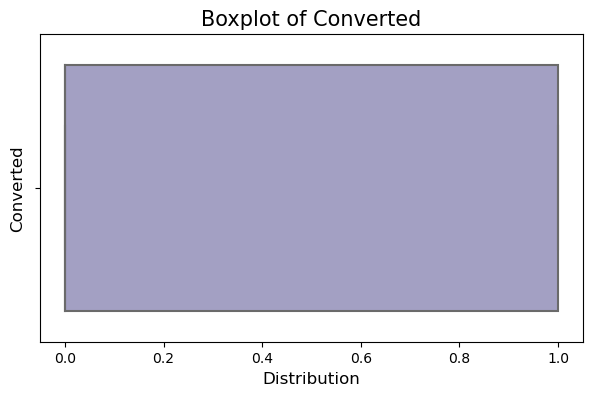

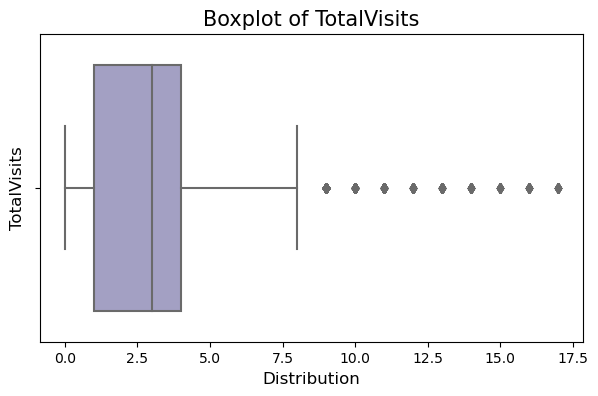

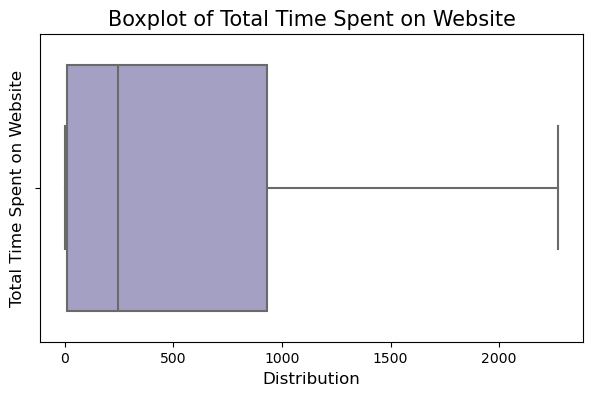

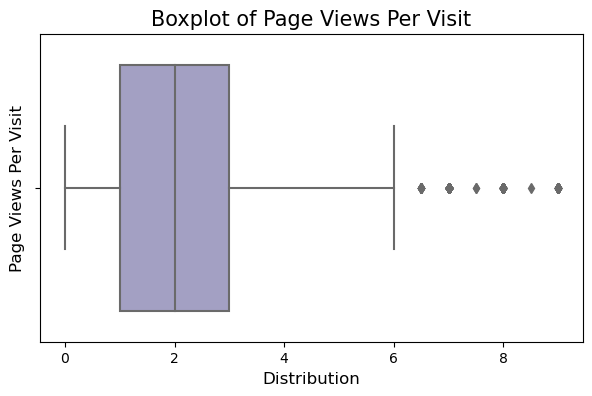

In [74]:
# Plotting count plot for all Numerical Columns for both 'Converted' 0 and 1 after capping all numerical outliers

for col in num_cols.columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=col, data=dfm1, orient='v', palette='Purples_r')
    plt.title(f'Boxplot of {col}', fontsize=15)
    plt.ylabel(col, fontsize=12)
    plt.xlabel('Distribution', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

-----

### Bivariate Analysis

------------------------------------------------------------------------------------------


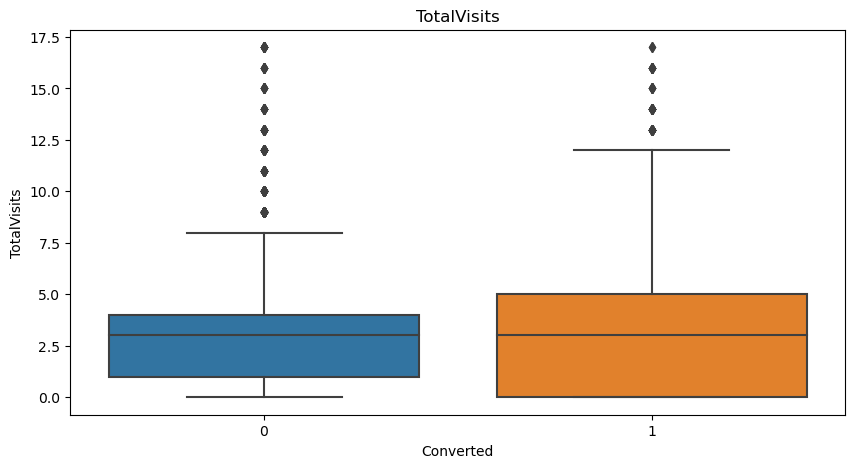

------------------------------------------------------------------------------------------


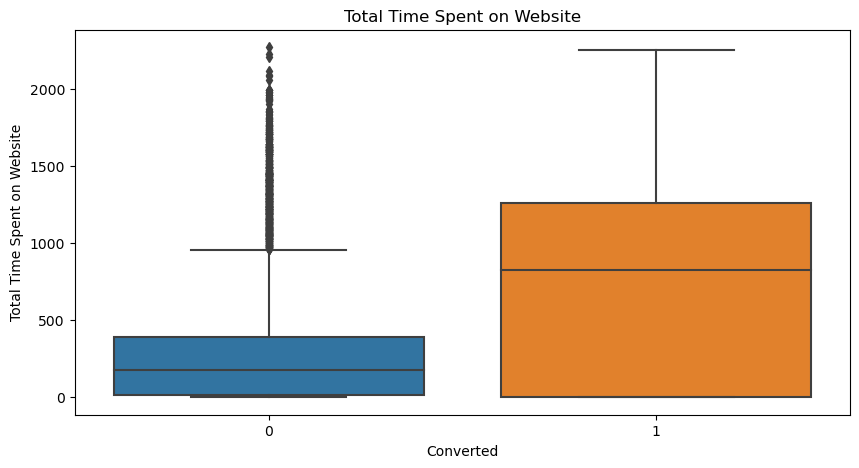

------------------------------------------------------------------------------------------


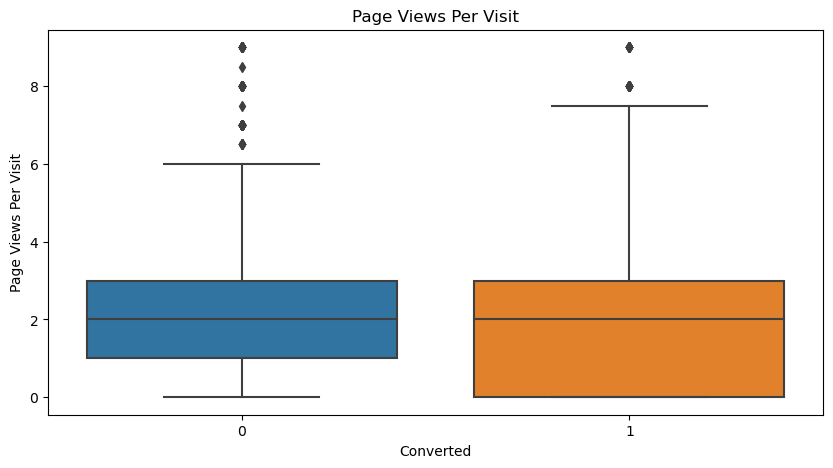

In [185]:
# Plotting box plot of "Total Time Spent on Website",'TotalVisits' and 'Page Views Per Visit' vs Converted variable to check data distribution:-
for i in num_cols:
    if i != 'Converted':
        plt.figure(figsize=(10,5))
        sns.boxplot(x='Converted', y=i,data=dfm1)
        plt.title(i)
        print('---------'*10)
        plt.show()

### Observations

- TotalVisits and Conversion: Median values for 'TotalVisits' are similar regardless of conversion status.

- Total Time Spent on Website: Leads spending more time on the website tend to convert more frequently.

- Page Views per Visit: Similar median values for converted and non-converted leads suggest page views per visit have minimal impact on conversions.
<br>
### Recommendations
- Increase Engagement Duration: Focus on strategies to prolong visitor time on the website.

- Optimize Conversion Pathways: Despite page views having limited impact, streamline pathways to enhance conversion rates.

- Utilize Engagement Metrics: Leverage insights from time spent on the website to refine conversion strategies effectively.


------

### Multivariate Analysis

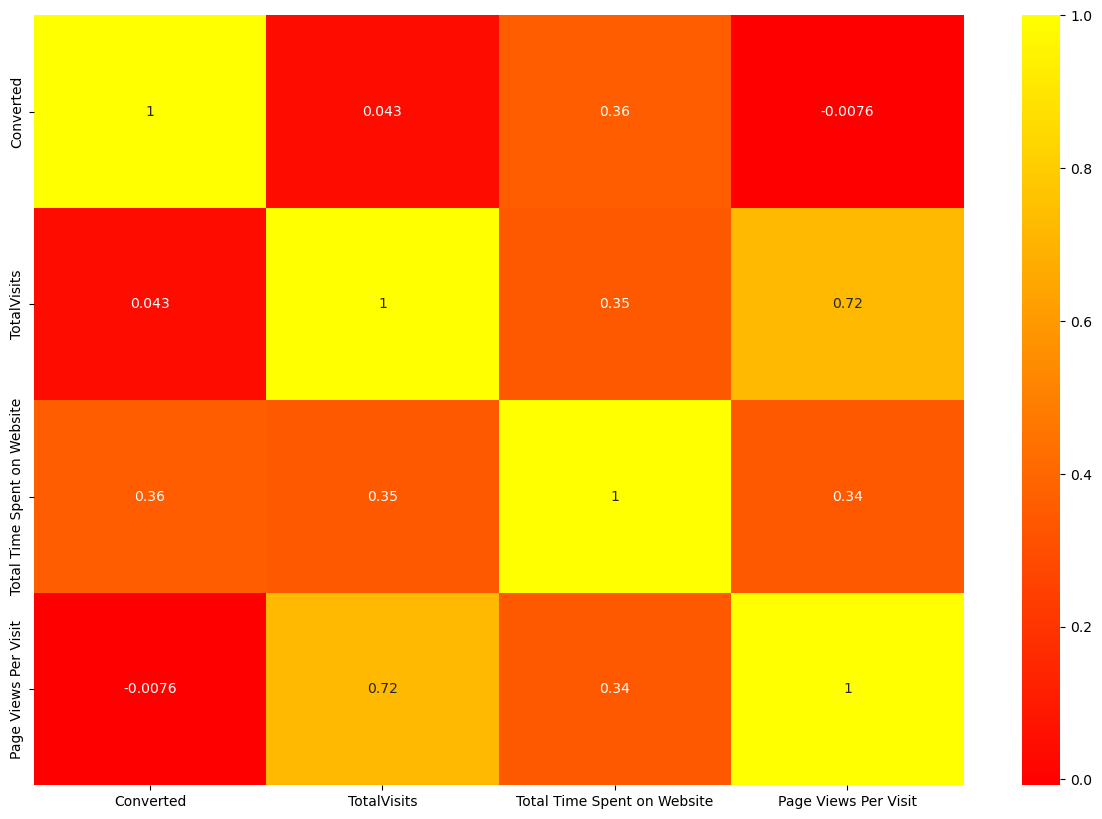

In [76]:
# Heatmap to understand the attributes correlation:-

plt.figure(figsize = (15,10))        
axis = sns.heatmap(dfm1.corr(),annot = True,cmap='autumn')

### Observations
- 'TotalVisits' and 'Page Views per Visit': Highly correlated at 0.72, indicating a strong relationship.
- 'Total Time Spent on Website': Moderately correlated at 0.36 with 'Converted', suggesting a potential influence on conversion.
<br>

### Recommendations
- Enhance strategies to increase both total visits and page views per visit, leveraging their strong correlation
- Focus on improving website engagement to potentially boost conversion rates, considering the moderate correlation with 'Total Time Spent on Website'.

## <font color = brown> 5. Data Preparation

In [77]:
# Variable to map
binary = ['Do Not Email', 'A free copy of Mastering The Interview']

# Mapping values using replace
dfm1[binary] = dfm1[binary].replace({'Yes': 1, 'No': 0})

In [78]:
dfm1.head()

Lead Origin     Lead Source  Do Not Email Do Not Call  Converted  TotalVisits  \
0                      API      Olark Chat             0          No          0          0.0   
1                      API  Organic Search             0          No          0          5.0   
2  Landing Page Submission  Direct Traffic             0          No          1          2.0   
3  Landing Page Submission  Direct Traffic             0          No          0          1.0   
4  Landing Page Submission          Google             0          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                       NA                      Unemployed   
1                       NA                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                       NA                      Unemployed   

  What matters most to you in choosing a course Search Magazine Newspaper Article  \
0                       Better Career Prospects     No       No                No   
1                       Better Career Prospects     No       No                No   
2                       Better Career Prospects     No       No                No   
3                       Better Career Prospects     No       No                No   
4                       Better Career Prospects     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content Asymmetrique Activity Index Asymmetrique Profile Index  \
0                        No                   02.Medium                  02.Medium   
1                        No                   02.Medium                  02.Medium   
2                        No                   02.Medium                    01.High   
3                        No                   02.Medium                    01.High   
4                        No                   02.Medium                    01.High   

  I agree to pay the amount through cheque  A free copy of Mastering The Interview  \
0                                       No                                       0   
1                                       No                                       0   
2                                       No                                       1   
3                                       No                                       0   
4                                       No                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2    

### Creating Dummy Variables

In [79]:
# For categorical variables with multiple levels, create dummy variables using one-hot encoding.

print(obj_cols.columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')


In [80]:
dummy_dfm = pd.get_dummies(dfm1[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True)

dummy_dfm.head()

Do Not Email  A free copy of Mastering The Interview  Lead Origin_Landing Page Submission  \
0             0                                       0                                    0   
1             0                                       0                                    0   
2             0                                       1                                    1   
3             0                                       0                                    1   
4             0                                       0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                          0                        0                           0   
1                          0                        0                           0   
2                          0                        0                           0   
3                          0                        0                           0   
4                          0                        0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                     0                   0                       1                           0   
1                     0                   0                       0                           1   
2                     0                   0                       0                           0   
3                     0                   0                       0                           0   
4                     0                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Do Not Call_Yes  Last Activity_Email Bounced  \
0                             0                0                            0   
1                             0                0                            0   
2                             0                0                            0   
3                             0                0                            0   
4                             0                0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  Last Activity_NA  \
0                                        0                 0   
1                                        0                 0   
2                                        0                 0   
3                                        0                 0   
4                                        0                 0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  \
0                                      1                       0                          0   
1

In [81]:
# Concatenating dummy dataframe with the original dataframe - 

dfm1= pd.concat([dummy_dfm,dfm1],axis = 1)

In [82]:
dfm1.head()

Do Not Email  A free copy of Mastering The Interview  Lead Origin_Landing Page Submission  \
0             0                                       0                                    0   
1             0                                       0                                    0   
2             0                                       1                                    1   
3             0                                       0                                    1   
4             0                                       0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                          0                        0                           0   
1                          0                        0                           0   
2                          0                        0                           0   
3                          0                        0                           0   
4                          0                        0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                     0                   0                       1                           0   
1                     0                   0                       0                           1   
2                     0                   0                       0                           0   
3                     0                   0                       0                           0   
4                     0                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Do Not Call_Yes  Last Activity_Email Bounced  \
0                             0                0                            0   
1                             0                0                            0   
2                             0                0                            0   
3                             0                0                            0   
4                             0                0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  Last Activity_NA  \
0                                        0                 0   
1                                        0                 0   
2                                        0                 0   
3                                        0                 0   
4                                        0                 0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  \
0                                      1                       0                          0   
1

In [83]:
# Dropping repeated columns for which dummy variables were created:-

dfm1.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],1,inplace = True)

In [84]:
dfm1.shape

(9090, 81)

In [85]:
# Checking datatypes column wise

dfm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Origin_Landing Page Submission                                      9090 non-null   uint8  
 1   Lead Origin_Lead Add Form                                                9090 non-null   uint8  
 2   Lead Origin_Lead Import                                                  9090 non-null   uint8  
 3   Lead Origin_Quick Add Form                                               9090 non-null   uint8  
 4   Lead Source_Facebook                                                     9090 non-null   uint8  
 5   Lead Source_Google                                                       9090 non-null   uint8  
 6   Lead Source_Olark Chat                                                  

### As all variables are now numeric in terms of Datatype, hence we go ahead with the Model

## <font color =brown> 6. Train-Test Split

In [86]:
# Putting feature variable to X:-
X = dfm1.drop(['Converted'], axis=1)

# Displaying head :-
X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                                    0                          0                        0   
1                                    0                          0                        0   
2                                    1                          0                        0   
3                                    1                          0                        0   
4                                    1                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
0                           0                     0                   0                       1   
1                           0                     0                   0                       0   
2                           0                     0                   0                       0   
3                           0                     0                   0                       0   
4                           0                     0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  Do Not Call_Yes  \
0                           0                             0                0   
1                           0                             0                0   
2                           0                             0                0   
3                           0                             0                0   
4                           0                             0                0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                            0                                 0                           0   
1                            0                                 0                           1   
2                            0                                 0                           1   
3                            0                                 0                           0   
4                            0                                 0                           0   

   Last Activity_Form Submitted on Website  Last Activity_NA  \
0                                        0                 0   
1                                        0                 0   
2                                        0                 0   
3                                        0                 0   
4                                        0                 0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  \
0                                      1                       0                          0   
1                                      0                       0                          0   
2                                      0                       0                          0   
3                                      0                       0                          1   
4                                      0                       0       

In [87]:
# Putting response variable to y:-
y = dfm1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
# Splitting the data into train and test of 70:30 ratio:-

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [89]:
# Shape of 'X_train' dataset afer the split - 

X_train.shape

(6363, 80)

In [90]:
# Shape of 'X_test' dataset afer the split - 

X_test.shape

(2727, 80)

In [91]:
# Checking the data set after the split - 

dfm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Origin_Landing Page Submission                                      9090 non-null   uint8  
 1   Lead Origin_Lead Add Form                                                9090 non-null   uint8  
 2   Lead Origin_Lead Import                                                  9090 non-null   uint8  
 3   Lead Origin_Quick Add Form                                               9090 non-null   uint8  
 4   Lead Source_Facebook                                                     9090 non-null   uint8  
 5   Lead Source_Google                                                       9090 non-null   uint8  
 6   Lead Source_Olark Chat                                                  

## <font color =brown> 7. Feature Scaling
    
    Using 'StandardScaler'

In [92]:
# Creating Scaler Object
scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set - 
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
302                                     0                          0                        0   
6087                                    0                          0                        0   
1033                                    0                          0                        0   
7656                                    1                          0                        0   
3241                                    1                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
302                            0                     0                   0   
6087                           0                     0                   0   
1033                           0                     0                   1   
7656                           0                     0                   0   
3241                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
302                        0                           0                   0   
6087                       1                           0                   0   
1033                       0                           0                   0   
7656                       0                           0                   0   
3241                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
302                       0                           1                             0   
6087                      0                           0                             0   
1033                      0                           0                             0   
7656                      0                           0                             0   
3241                      0                           0                             0   

      Do Not Call_Yes  Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
302                 0                            0                                 0   
6087                0                            1                                 0   
1033                0                            0                                 0   
7656                0                            0                                 0   
3241                0                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_NA  \
302                            1                                        0                 0   
6087                           0                                        0                 0   
1033                           1                                        0                 0   
7656                           0                                        0                 0   
3241                           0                                        0                 0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
302                                       0                     0   
6087                                      0                     0   
1033                                      0                     0   
7656                                      0                     0   
3241                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  \
302                                       0                       0                          0   
6087                                      0                       0                          0   
1033                                      0                       0                          0   
7656                           

###  Checking the Correlation Matrix

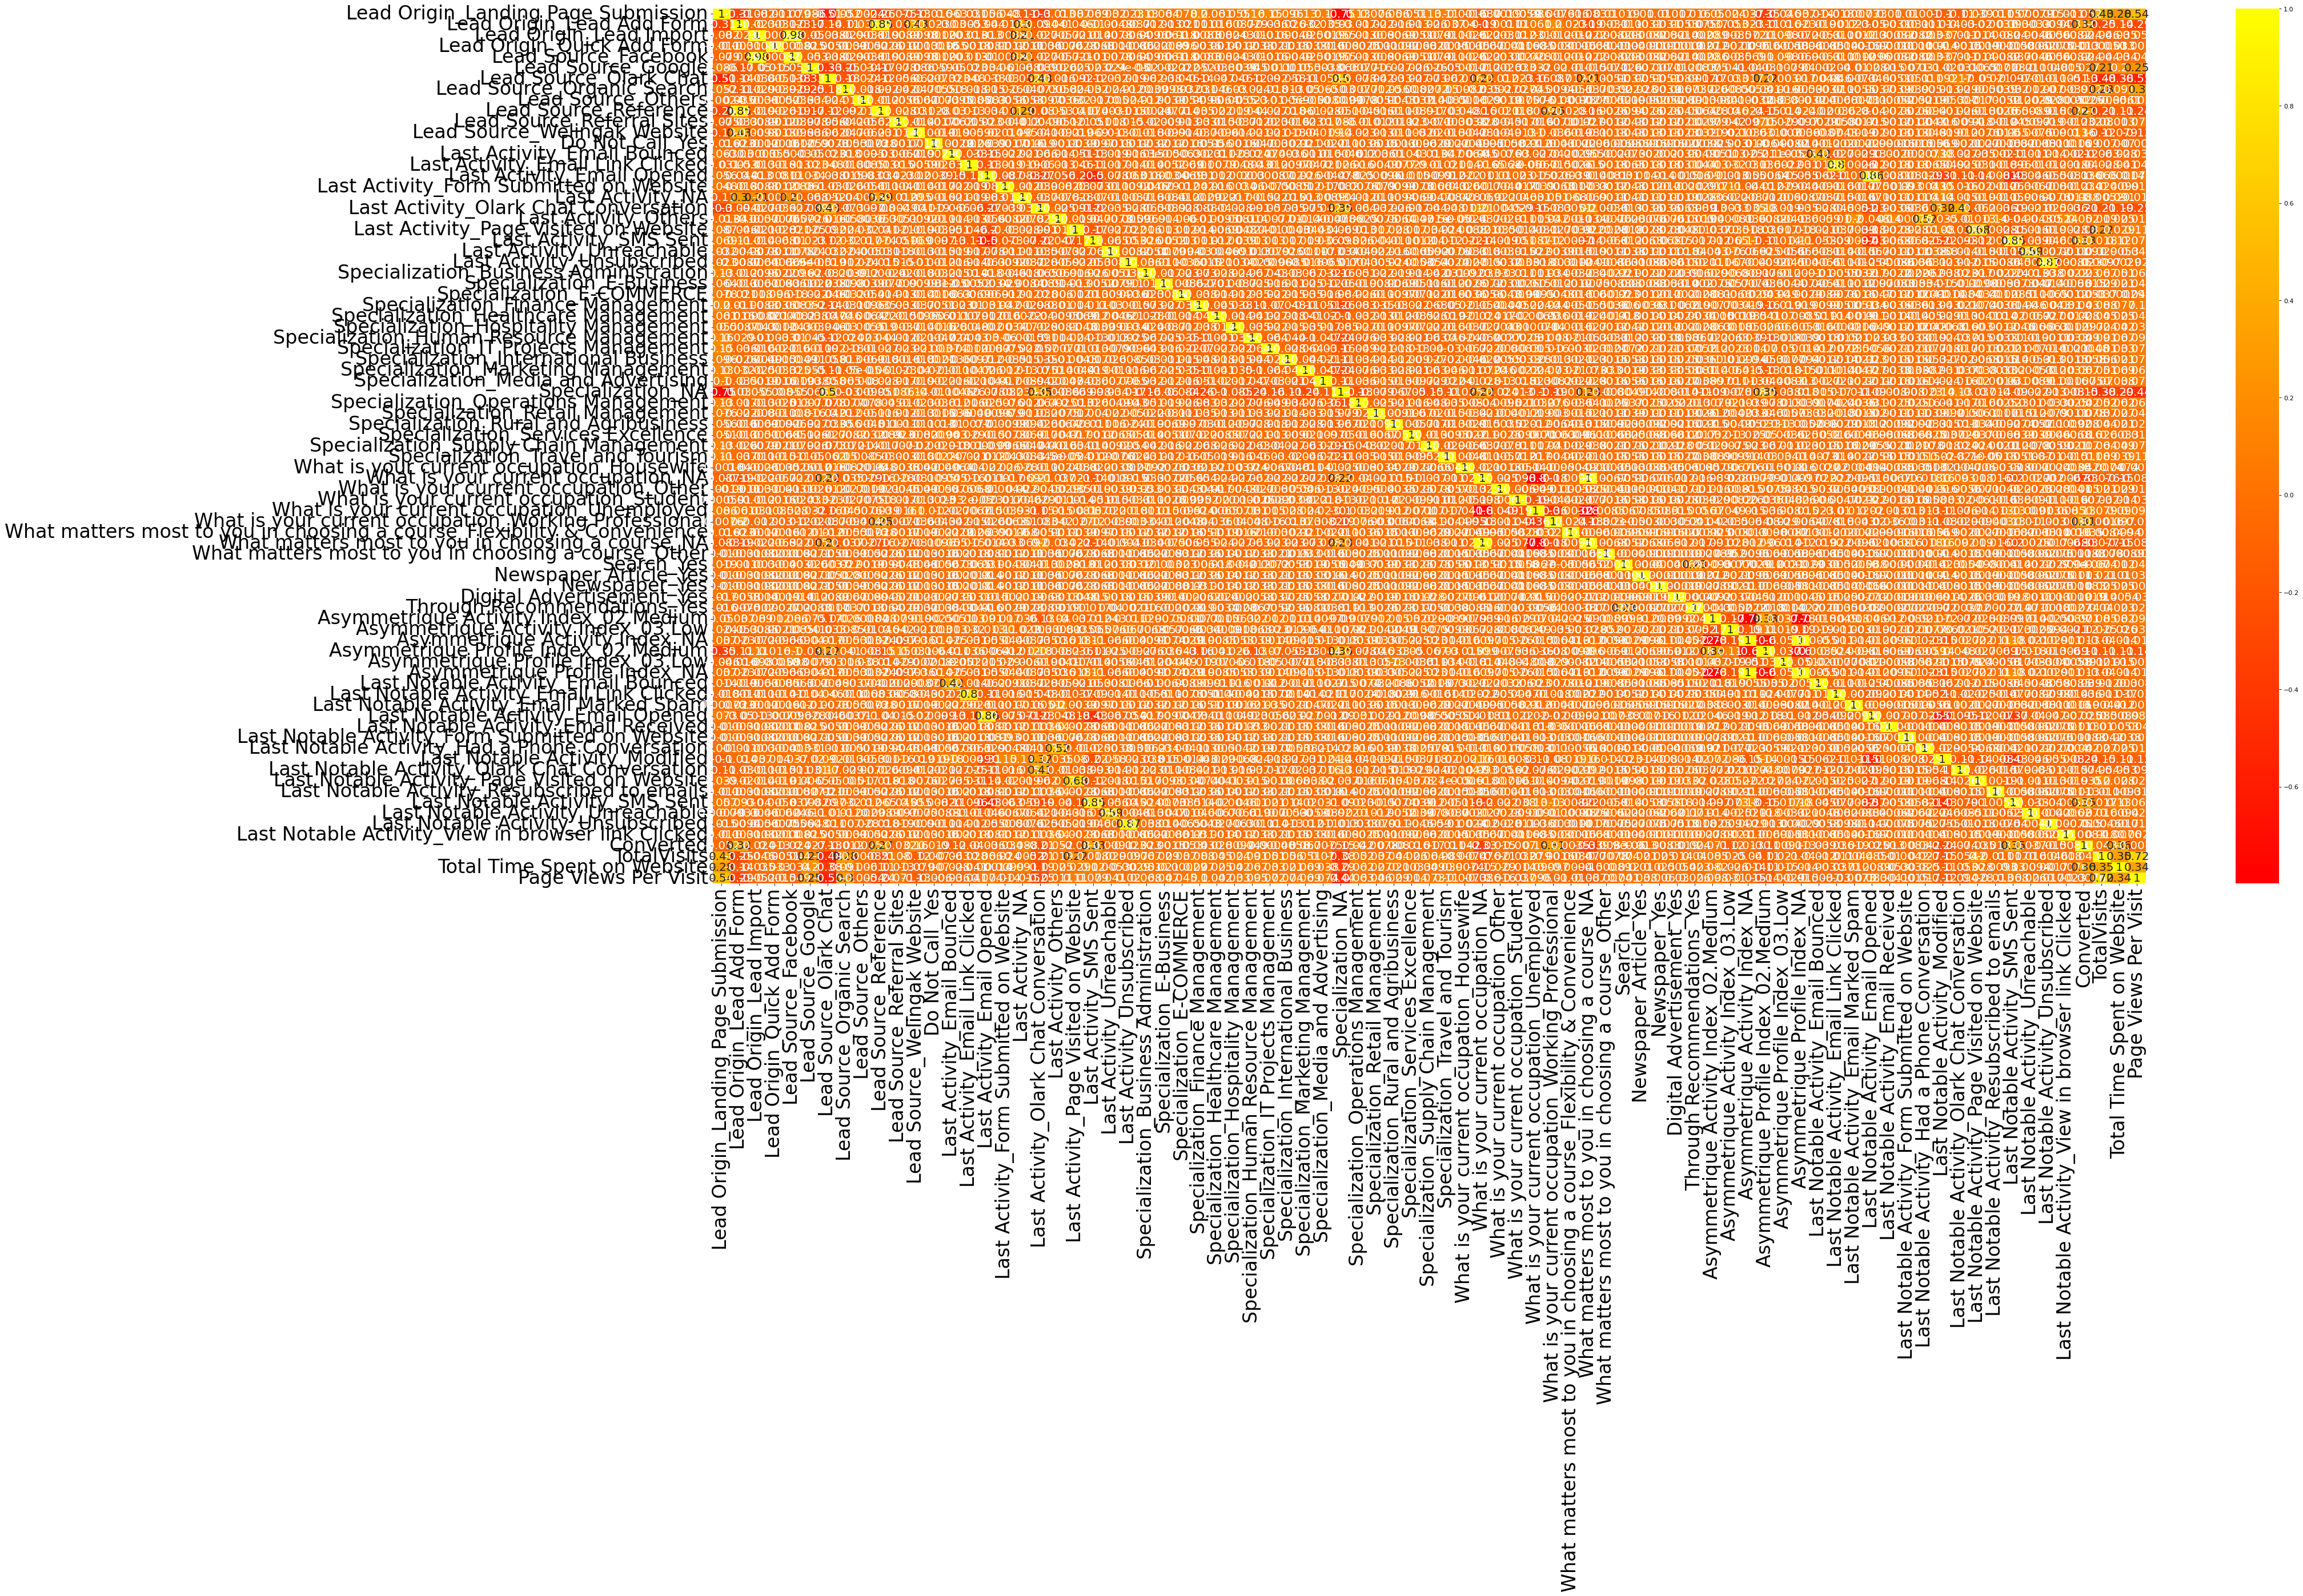

In [93]:
# Let's check the correlation coefficients to see which variables are highly correlated:-

plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(dfm1.corr(), annot = True, cmap="autumn",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

### Observations
The heatmap highlights variables that exhibit multicollinearity and shows high collinearity with the target variable.
This heatmap will guide the selection and elimination of variables in the logistic model, using VIF and p-values for validation.

From the heatmap, we observe:

- High Multicollinearity:
    - Lead Source_Facebook and Lead Origin_Lead Import: Correlation of 0.98.
    - Do Not Email and Last Activity_Email Bounced: High correlation.
    - Lead Origin_Lead Add Form and Lead Source_Reference: Correlation of 0.85.
    - TotalVisits and Page Views Per Visit: Correlation of 0.72.

- Positive Correlation with Target Variable 'Converted':
    - Lead Origin_Lead Add Form
    - Lead Source_Welingak Website
    - Last Activity_SMS Sent
    - What is your current Occupation_Working Professionals

## <font color =brown> 8. Model Building

### 8.1 Model Building Using Stats Model and RFE -

In [94]:
# Creating LogisticRegression Object called 'regressor':-

regressor = LogisticRegression()

### 8.2 Using RFE for Feature Selection

In [95]:
# Necessary Libraries are already imported

# Running the RFE to get 15 features as the output
rfe = RFE(estimator=regressor, n_features_to_select=15)

# Fit the RFE object on the training data
rfe = rfe.fit(X_train, y_train)

In [96]:
#Displaying Columns Selected by RFE and Their Weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 51),
 ('Lead Source_Facebook', False, 64),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 55),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Reference', False, 48),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Call_Yes', False, 33),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_NA', False, 10),
 ('Last Activity_Olark Chat Conversation', False, 28),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 65),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 18),
 ('Last Activity

In [97]:
# Storing columns selected by RFE into 'cylinder1' and displaying it:-

cylinder1 = X_train.columns[rfe.support_]
cylinder1

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_NA', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable',
       'Total Time Spent on Website'],
      dtype='object')

In [98]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Do Not Call_Yes', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_NA',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management', 'Specialization_Hospitality Management',
       'Specialization_Human Resource Management', 'Specialization_IT Projects Management',
       'Specialization_International Business', 'Specialization_Marketing Manageme

In [99]:
# Creating X_test dataframe with RFE selected variables only - 

X_train_RFE = X_train[cylinder1]

### 8.3 Using Manual Feature Selection

#### 8.3.1 Model 1

Starting with the features selected by RFE

In [100]:
# Statsmodels library is already imported

In [101]:
# Add a constant:-
X_train_sm = sm.add_constant(X_train_RFE)

# Building first fitted model:-
log_mod1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [102]:
# Summary of the logistic regression model obtained - 

log_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2533.8
Date:                Tue, 18 Jun 2024   Deviance:                       5067.5
Time:                        15:24:08   Pearson chi2:                 6.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4133
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9423      0.061    -15.481      0.000      -1.062      -0.823
Lead Origin_Lead Add Form                                3.4171      0.198     17.275      0.000       3.029       3.805
Lead Source_Olark Chat                                   1.1977      0.104     11.509      0.000       0.994       1.402
Lead Source_Welingak Website                             2.7390      1.026      2.669      0.008       0.728       4.750
Last Activity_Email Bounced                             -1.5617      0.338     -4.627      0.000      -2.223      -0.900
Last Activity_Others                                     1.0767      0.594      1.812      0.070      -0.088       2.242
Last Activity_SMS Sent                                   1.2195      0.076     16.082      0.000       1.071       1.368
What is your current occupation_Housewife               23.9007   2.32e+04      0.001      0.999   -4.55e+04    4.56e+04
What is your current occupation_Working Professional     2.5493      0.190     13.418      0.000       2.177       2.922
What matters most to you in choosing a course_NA        -1.2458      0.089    -13.995      0.000      -1.420      -1.071
Asymmetrique Activity Index_03.Low                      -1.8833      0.276     -6.814      0.000      -2.425      -1.342
Last Notable Activity_Had a Phone Conversation          22.9338   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
Last Notable Activity_Modified                          -0.8408      0.080    -10.464      0.000      -0.998      -0.683
Last Notable Activity_Olark Chat Conversation           -1.3031      0.327     -3.987      0.000      -1.944      -0.663
Last Notable Activity_Unreachable                        2.1128      0.621      3.403      0.001       0.896       3.330
Total Time Spent on Website                              1.1056      0.041     27.021      0.000       1.025       1.186
========================================================================================================================
"""

### VIF (Variance Inflation Factor) check for Multicollinearity

In [103]:
# Library 'variance_inflation_factor' from 'statsmodels' is already imported - 

In [104]:
# Creating a 'vif' dataframe containing features and their VIF values - 

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                           Lead Origin_Lead Add Form  1.51
11                     Last Notable Activity_Modified  1.48
1                              Lead Source_Olark Chat  1.46
8    What matters most to you in choosing a course_NA  1.43
4                                Last Activity_Others  1.34
10     Last Notable Activity_Had a Phone Conversation  1.32
2                        Lead Source_Welingak Website  1.29
14                        Total Time Spent on Website  1.23
5                              Last Activity_SMS Sent  1.20
7   What is your current occupation_Working Profes...  1.17
3                         Last Activity_Email Bounced  1.08
12      Last Notable Activity_Olark Chat Conversation  1.07
9                  Asymmetrique Activity Index_03.Low  1.04
6           What is your current occupation_Housewife  1.00
13                  Last Notable Activity_Unreachable  1.00

In [105]:
# Dropping the insignifcant columns and updating the model because of insignifcant variable p-value = 0.999 (p>0.05) - 

X_train_1 = X_train_RFE.drop(["What is your current occupation_Housewife"], axis = 1)
X_train_1 = X_train_1.drop(['Last Notable Activity_Had a Phone Conversation'],axis = 1)

#### 8.3.2 Model 2

In [106]:
# Adding a new constant - 
X_train_sm2 = sm.add_constant(X_train_1)

# Building second model-
log_mod2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [107]:
log_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.8
Date:                Tue, 18 Jun 2024   Deviance:                       5087.6
Time:                        15:24:08   Pearson chi2:                 6.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9276      0.061    -15.304      0.000      -1.046      -0.809
Lead Origin_Lead Add Form                                3.4243      0.197     17.338      0.000       3.037       3.811
Lead Source_Olark Chat                                   1.1876      0.104     11.433      0.000       0.984       1.391
Lead Source_Welingak Website                             2.7207      1.026      2.651      0.008       0.710       4.732
Last Activity_Email Bounced                             -1.5680      0.337     -4.646      0.000      -2.230      -0.907
Last Activity_Others                                     1.7073      0.520      3.284      0.001       0.688       2.726
Last Activity_SMS Sent                                   1.2096      0.076     15.971      0.000       1.061       1.358
What is your current occupation_Working Professional     2.5321      0.190     13.348      0.000       2.160       2.904
What matters most to you in choosing a course_NA        -1.2543      0.089    -14.099      0.000      -1.429      -1.080
Asymmetrique Activity Index_03.Low                      -1.8945      0.276     -6.866      0.000      -2.435      -1.354
Last Notable Activity_Modified                          -0.8455      0.080    -10.553      0.000      -1.002      -0.688
Last Notable Activity_Olark Chat Conversation           -1.3080      0.327     -4.003      0.000      -1.948      -0.668
Last Notable Activity_Unreachable                        2.1037      0.621      3.388      0.001       0.887       3.321
Total Time Spent on Website                              1.1034      0.041     27.025      0.000       1.023       1.183
========================================================================================================================
"""

In [108]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                           Lead Origin_Lead Add Form  1.50
9                      Last Notable Activity_Modified  1.48
1                              Lead Source_Olark Chat  1.46
7    What matters most to you in choosing a course_NA  1.43
2                        Lead Source_Welingak Website  1.29
12                        Total Time Spent on Website  1.23
5                              Last Activity_SMS Sent  1.20
6   What is your current occupation_Working Profes...  1.17
3                         Last Activity_Email Bounced  1.08
10      Last Notable Activity_Olark Chat Conversation  1.07
8                  Asymmetrique Activity Index_03.Low  1.04
4                                Last Activity_Others  1.01
11                  Last Notable Activity_Unreachable  1.00

In [109]:
#Dropping 'Last Activity_Others' because of  p-value>0.05:-

X_train_1 = X_train_1.drop(["Last Activity_Others"], axis = 1)
X_train_1 = X_train_1.drop(['Lead Source_Welingak Website'],axis = 1)
X_train_1 = X_train_1.drop(['Last Notable Activity_Unreachable'],axis = 1)

#### 8.3.3 Model 3

In [110]:
# Adding Constant
X_train_sm3 = sm.add_constant(X_train_1)

# Building the 3rd Model - 
log_mod3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [111]:
log_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.0
Date:                Tue, 18 Jun 2024   Deviance:                       5128.1
Time:                        15:24:08   Pearson chi2:                 6.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8990      0.060    -14.964      0.000      -1.017      -0.781
Lead Origin_Lead Add Form                                3.7538      0.190     19.724      0.000       3.381       4.127
Lead Source_Olark Chat                                   1.1721      0.104     11.321      0.000       0.969       1.375
Last Activity_Email Bounced                             -1.5816      0.335     -4.720      0.000      -2.238      -0.925
Last Activity_SMS Sent                                   1.1854      0.075     15.738      0.000       1.038       1.333
What is your current occupation_Working Professional     2.5450      0.191     13.359      0.000       2.172       2.918
What matters most to you in choosing a course_NA        -1.2448      0.089    -14.054      0.000      -1.418      -1.071
Asymmetrique Activity Index_03.Low                      -1.9011      0.277     -6.869      0.000      -2.444      -1.359
Last Notable Activity_Modified                          -0.8545      0.080    -10.730      0.000      -1.011      -0.698
Last Notable Activity_Olark Chat Conversation           -1.3332      0.327     -4.076      0.000      -1.974      -0.692
Total Time Spent on Website                              1.1024      0.041     27.074      0.000       1.023       1.182
========================================================================================================================
"""

In [112]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                     Last Notable Activity_Modified  1.47
1                             Lead Source_Olark Chat  1.46
5   What matters most to you in choosing a course_NA  1.42
9                        Total Time Spent on Website  1.22
0                          Lead Origin_Lead Add Form  1.20
3                             Last Activity_SMS Sent  1.20
4  What is your current occupation_Working Profes...  1.14
2                        Last Activity_Email Bounced  1.08
8      Last Notable Activity_Olark Chat Conversation  1.07
6                 Asymmetrique Activity Index_03.Low  1.04

### Note - All the VIF values are well below the threshold of 5, indicating low multicollinearity. This suggests that the predictors are not highly correlated with each other and are suitable for inclusion in the model.

In [113]:
### Making prediction on 'train' dataset based on the final model

# Calculating predicted values of 'y_train':-
y_train_pred = log_mod3.predict(X_train_sm3)
                            
y_train_pred[:10] # Displaying 10 values

302     0.068090
6087    0.012296
1033    0.283591
7656    0.505017
3241    0.781765
5738    0.044990
7366    0.173685
3680    0.024092
4170    0.766203
43      0.064583
dtype: float64

In [114]:
# Reshaping :-

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06808967, 0.01229572, 0.28359149, 0.5050167 , 0.78176457,
       0.04499039, 0.17368476, 0.02409151, 0.76620292, 0.06458317])

In [115]:
# Creating dataframe 'y_train_final_predict' with actual and predicted - 
y_train_final_predict = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-
y_train_final_predict['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-
y_train_final_predict.head()

Converted  Converted_Prob  Prospect ID
0          0        0.068090          302
1          0        0.012296         6087
2          0        0.283591         1033
3          0        0.505017         7656
4          1        0.781765         3241

## <font color =brown> 9. Finding Optimal Cutoff Point
    
    The cutoff point is a predefined value that separates different classes in a classification model. For binary classification, it is the threshold probability at which the predicted outcome switches from one class to another.

In [116]:
# Let's create columns with different probability cutoffs :-
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_final_predict[i]= y_train_final_predict.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_final_predict.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0        0.068090          302    1    0    0    0    0    0    0    0    0    0
1          0        0.012296         6087    1    0    0    0    0    0    0    0    0    0
2          0        0.283591         1033    1    1    1    0    0    0    0    0    0    0
3          0        0.505017         7656    1    1    1    1    1    1    0    0    0    0
4          1        0.781765         3241    1    1    1    1    1    1    1    1    0    0

In [117]:
#Import 'metrics' library (Already imported)


# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final_predict.Converted, y_train_final_predict[i] )
    total1=sum(sum(cm1))
    acc = (cm1[0,0]+cm1[1,1])/total1
    
    spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sens = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,acc,sens,spec]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.640107  0.970346  0.436341
0.2   0.2  0.769134  0.913097  0.680305
0.3   0.3  0.801823  0.872735  0.758069
0.4   0.4  0.815339  0.778418  0.838119
0.5   0.5  0.822096  0.711697  0.890216
0.6   0.6  0.812667  0.641680  0.918170
0.7   0.7  0.785793  0.529242  0.944091
0.8   0.8  0.763162  0.432455  0.967217
0.9   0.9  0.716643  0.277183  0.987802


<Figure size 1000x500 with 0 Axes>

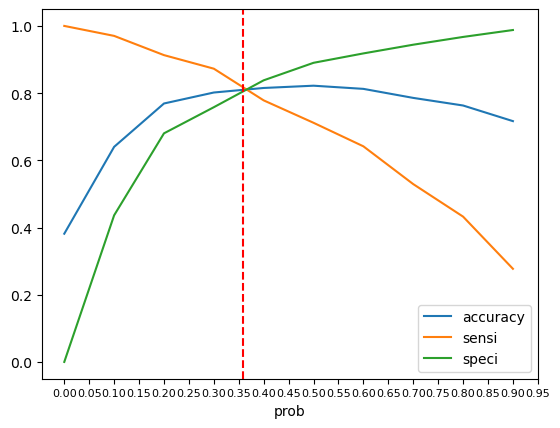

In [118]:
#Plotting accuracy, sensitivity and specificity for various probabilities:-

plt.figure(figsize=(10,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # adding axline

plt.show()

In [119]:
# From the curve above, it seems the optimal cutt off point is approx 0.358
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point:-
y_train_final_predict['final_predicted'] = y_train_final_predict.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [120]:
# Dropping the unnecessary columns:-
y_train_final_predict.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)

In [121]:
y_train_final_predict.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.068090          302                0
1          0        0.012296         6087                0
2          0        0.283591         1033                0
3          0        0.505017         7656                1
4          1        0.781765         3241                1

In [122]:
# Assigning lead score to the leads based on prediction
y_train_final_predict['Lead_Score'] = y_train_final_predict.Converted_Prob.map( lambda x: round(x*100))

In [123]:
# Selecting only important columns and displaying head of dataframe:-
y_train_final_predict[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.068090          302                0           7
1          0        0.012296         6087                0           1
2          0        0.283591         1033                0          28
3          0        0.505017         7656                1          51
4          1        0.781765         3241                1          78

## <font color =brown> 10. Model Evaluation

### Confusion Matrix

In [124]:
# Confusion matrix:-

confusion = metrics.confusion_matrix(y_train_final_predict.Converted, y_train_final_predict.final_predicted)
print(confusion)

[[3195  740]
 [ 471 1957]]


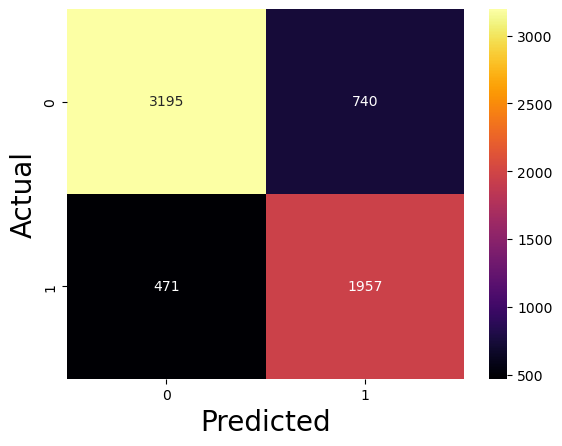

In [125]:
# Import Metric to plot confusion matrix- Already Done

# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='inferno')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [126]:
# Calculating Accuracy -

print('Accuracy = ', metrics.accuracy_score(y_train_final_predict.Converted, y_train_final_predict.final_predicted))

Accuracy =  0.8096809680968097


In [127]:
#Creating variables for possibilities - 

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Checking Sensitivity of model - 

print("Sensitivity = ",TP / float(TP+FN))

Sensitivity =  0.806013179571664


In [129]:
# Calculating Specificity of the model - 

print("Specificity = ",TN / float(TN+FP))

Specificity =  0.8119440914866582


In [130]:
# Calculation of False Positive Rate

print("False Positive Rate = ",FP / float(TN+FP)) # predicting conversion of the customers that will not convert.

False Positive Rate =  0.1880559085133418


In [131]:
# Calculation of Positive Predictive Value - 

print("Positive Predicitive Rate = ",TP / float(TP+FP))

Positive Predicitive Rate =  0.7256210604375232


In [132]:
# Calculation of Negative Predictive Value - 

print("Negative Predictive Rate = ",TN / float (TN+FN))

Negative Predictive Rate =  0.8715220949263502


In [133]:
print("Precision = ", confusion[1,1]/(confusion[0,1]+confusion[1,1]))
# Precision = TP/(TP+FP)

Precision =  0.7256210604375232


In [134]:
print("Recall = ", confusion[1,1]/(confusion[1,0]+confusion[1,1]))
# Recall = TP/(TP+FN)

Recall =  0.806013179571664


In [135]:
# Importing 'precision_score' and 'recall_score' from sklearn library - 

from sklearn.metrics import precision_score, recall_score

In [136]:
# Calculating Precision Score Value -
print("Precision Score = ",precision_score(y_train_final_predict.Converted, y_train_final_predict.final_predicted))

Precision Score =  0.7256210604375232


In [137]:
# Calculating Recall Score Value - 
print("Recall Score = ",recall_score(y_train_final_predict.Converted, y_train_final_predict.final_predicted))

Recall Score =  0.806013179571664


### Observation

We have the following values for the Train Data:
- Accuracy : 81.01%
- Sensitivity : 80.72%
- Specificity : 81.19%
- Precision: 72.59%
- Recall: 80.72%

## <font color =brown> 11. Plotting the ROC (Receiver Operating Characteristic) curve
    
- Sensitivity vs. False Positives:
    - Sensitivity (True Positive Rate): The percentage of actual positives correctly identified.
    - False Positive Rate: The percentage of actual negatives incorrectly identified as positives.
    
- Performance at Different Thresholds:
    - Each point on the ROC curve shows the model's sensitivity and false positive rate for a different decision threshold.

- Overall Model Quality:
    - A curve closer to the top-left corner means better performance.
    - The Area Under the Curve (AUC) gives a single score:
        - AUC = 1: Perfect model.
        - AUC = 0.5: Random guessing.

In [138]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [139]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_final_predict.Converted, y_train_final_predict.Converted_Prob, drop_intermediate = False )
# used to compute the necessary components for plotting an ROC (Receiver Operating Characteristic) curve in the context of evaluating a binary classification model.

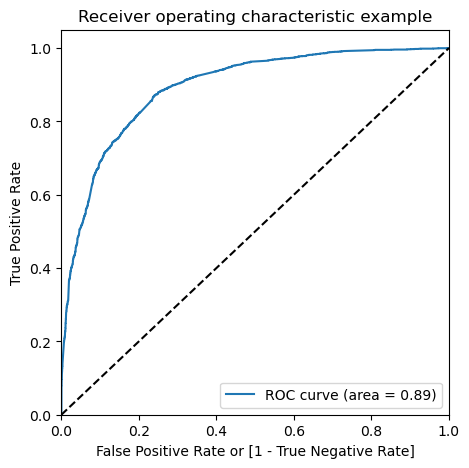

In [140]:
roc(y_train_final_predict.Converted, y_train_final_predict.Converted_Prob)
# used to plot the ROC curve (User-made function)

### Observation

- As the area under the curve of the plotted ROC is close to 1. A higher AUC indicates that the model has a good balance between sensitivity (true positive rate) and specificity (false positive rate).
- The model is overall a good model and has an 89% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance.

In [141]:
# Precison and Recall Trade-off - 
#Import 'precision_recall_curve' - (Already imported)

p, r, thresholds = precision_recall_curve(y_train_final_predict.Converted, y_train_final_predict.Converted_Prob)
# used to compute the precision-recall curve, 
# which is another tool for evaluating the performance of a binary classification model, 
# particularly in cases where the classes are imbalanced.

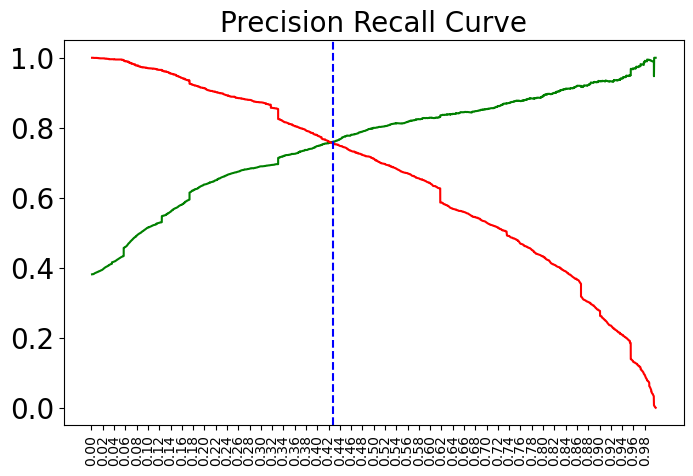

In [191]:
# Plotting the precision-recall curve
plt.figure(figsize=(8,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10,rotation = 90)
plt.yticks(size=20)

plt.show()

### Observation

- From the above precision_recall_curve, we can see that the optimal cutoff point is 0.427.

In [143]:
# Using this threshold value from 'Precision Recall Tradeoff Curve' for data evaluation - 

# Plotting the Train dataset with 0.427 as cut-off - 
y_train_final_predict['final_predicted_2'] = y_train_final_predict['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)

y_train_final_predict.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  final_predicted_2
0          0        0.068090          302                0           7                  0
1          0        0.012296         6087                0           1                  0
2          0        0.283591         1033                0          28                  0
3          0        0.505017         7656                1          51                  1
4          1        0.781765         3241                1          78                  1

In [144]:
# Confusion matrix:-
confusion_2 = metrics.confusion_matrix(y_train_final_predict.Converted, y_train_final_predict.final_predicted_2)

confusion_2

array([[3353,  582],
       [ 593, 1835]], dtype=int64)

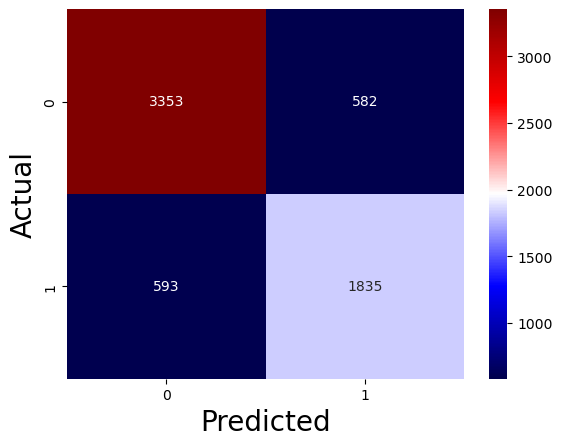

In [145]:
# Plotting confusion matrix:-
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='seismic')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [146]:
# Calculating the overall accuracy:-

print("Accuracy = ",metrics.accuracy_score(y_train_final_predict.Converted, y_train_final_predict.final_predicted_2))

Accuracy =  0.8153386767248153


In [147]:
TP1 = confusion_2[1,1] # true positive 
TN1 = confusion_2[0,0] # true negatives
FP1 = confusion_2[0,1] # false positives
FN1 = confusion_2[1,0] # false negatives

In [148]:
# Calculating the Sensitivity of the Model -

print("Sensitivity = ",TP / float(TP+FN))

Sensitivity =  0.806013179571664


In [149]:
# Calculating Specificity of the Model - 

print("Specificity = ",TP/ float(TN+FP))

Specificity =  0.49733163913595935


In [150]:
# Calculating Positive Predictive Value -

print("Positive Predicitve Value = ",TP / float(TP+FP))

Positive Predicitve Value =  0.7256210604375232


In [151]:
# Calculating Negative Predictive Value - 

print("Negative Predictive Value = ",TN / float(TN+ FN))

Negative Predictive Value =  0.8715220949263502


In [152]:
# Calculating Precision -

print("Precision = ",confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1]))

Precision =  0.7592056268100952


In [153]:
# Calculating Recall - 

print("Recall = ",confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1]))

Recall =  0.7557660626029654


## <font color =brown> 12. Prediction on the test set

In [154]:
# Applying 'transform' to scale the 'test' data set - 

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [155]:
# Predicting using values used by the Final Model - 'log_mod3'
test_col = X_train_sm3.columns
X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 6906 to 6219
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2727 non-null   float64
 1   Lead Origin_Lead Add Form                             2727 non-null   uint8  
 2   Lead Source_Olark Chat                                2727 non-null   uint8  
 3   Last Activity_Email Bounced                           2727 non-null   uint8  
 4   Last Activity_SMS Sent                                2727 non-null   uint8  
 5   What is your current occupation_Working Professional  2727 non-null   uint8  
 6   What matters most to you in choosing a course_NA      2727 non-null   uint8  
 7   Asymmetrique Activity Index_03.Low                    2727 non-null   uint8  
 8   Last Notable Activity_Modified                        2

In [156]:
# Making Predictions on the X_test using the data model -
y_test_pred = log_mod3.predict(X_test)

In [157]:
y_test_pred[:10]

6906    0.917014
1873    0.236820
771     0.144532
4495    0.169945
9061    0.410838
4929    0.383962
2308    0.037747
1034    0.062769
9033    0.143535
7008    0.927580
dtype: float64

In [158]:
# Converting y_test_pred to a dataframe -
y_test_pred = pd.DataFrame(y_test_pred)

In [159]:
y_test_pred.head()

0
6906  0.917014
1873  0.236820
771   0.144532
4495  0.169945
9061  0.410838

In [160]:
# Converting y_test to a dataframe - 
y_test = pd.DataFrame(y_test)

In [161]:
# Placing 'Prospect ID' to Index - 
y_test['Prospect ID'] = y_test.index

In [162]:
# Removing index for both dataframes to append.
y_test_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [163]:
# Concatenating 'y_test' and 'y_test_pred' - 
y_pred_final = pd.concat([y_test,y_test_pred],axis = 1)

In [164]:
y_pred_final.head()

Converted  Prospect ID         0
0          1         6906  0.917014
1          0         1873  0.236820
2          0          771  0.144532
3          0         4495  0.169945
4          1         9061  0.410838

In [165]:
# Renaming column '0' to 'Converted Probability'
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [166]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']] # Column re-arrangement

In [167]:
y_pred_final

Prospect ID  Converted  Converted_Prob
0            6906          1        0.917014
1            1873          0        0.236820
2             771          0        0.144532
3            4495          0        0.169945
4            9061          1        0.410838
...           ...        ...             ...
2722         1939          0        0.308878
2723         1540          1        0.299657
2724         5198          1        0.094277
2725         8660          0        0.057081
2726         6219          0        0.451575

[2727 rows x 3 columns]

In [168]:
# Assigning 'Lead Score' to dataframe 'y_pred_final' - 
y_pred_final['Lead Score'] = y_pred_final["Converted_Prob"].map(lambda x : round (x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead Score
0         6906          1        0.917014          92
1         1873          0        0.236820          24
2          771          0        0.144532          14
3         4495          0        0.169945          17
4         9061          1        0.410838          41

In [169]:
# Using Cutoff as 0.358 base on the Converted_Prob and Calculating the 'final_pred'
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

In [170]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead Score  final_Predicted
0         6906          1        0.917014          92                1
1         1873          0        0.236820          24                0
2          771          0        0.144532          14                0
3         4495          0        0.169945          17                0
4         9061          1        0.410838          41                1

In [171]:
# Test Model Evaluation

# Checking the accuracy of the model - 
print("Accuracy = ", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Accuracy =  0.7968463513017968


In [172]:
# Calculation of Confusion Matrix for test data - 

confusion2 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_Predicted)
confusion2

array([[1336,  324],
       [ 230,  837]], dtype=int64)

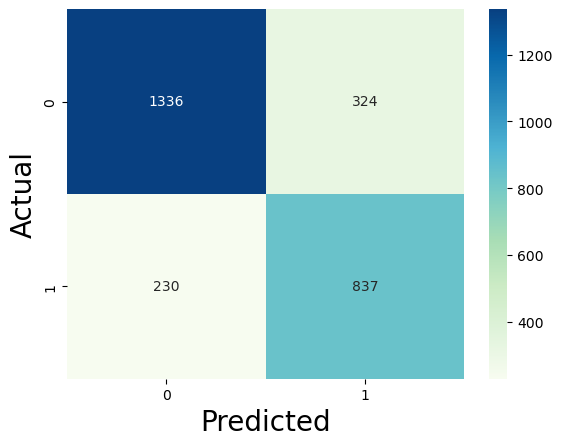

In [173]:
# Plotting confusion matrix:-
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Calculating the Sensitivity of the Logisticc Regression Model - 

print("Sensitivity = ", TP / float(TP+FN))

Sensitivity =  0.7844423617619494


In [176]:
# Calculating the Specificity of the Logistic Regression Model - 

print("Specificity = ", TN / float(TN+FP))

Specificity =  0.8048192771084337


In [177]:
# Calculating False Postive Rate - predicting conversion when customer does not have convert:-

print("False Positive Rate = ", FP/ float(TN+FP))

False Positive Rate =  0.19518072289156627


In [178]:
# Calculating positive predictive value :-

print ("Positive Predictive Value = ",TP / float(TP+FP))

Positive Predictive Value =  0.7209302325581395


In [179]:
# Calculating Negative predictive value:-

print ("Negative Predictive Value = ",TN / float(TN+ FN))

Negative Predictive Value =  0.8531289910600255


In [180]:
# Calculating 'precision_score':-

print('Precision Score =',precision_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Precision Score = 0.7209302325581395


In [181]:
#Calculating 'recall_score':-

print('Recall Score =',recall_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Recall Score = 0.7844423617619494


### Observation

We have the following values for the Test Data:
- Accuracy : 79.72%
- Sensitivity : 78.63%
- Specificity : 80.42%
- Precision: 72.07%
- Recall: 78.63%

In [182]:
# Determining Top Feature based on Final Model (log_mod3) - 

pd.options.display.float_format = '{:.2f}'.format # Setting format option
log_mod3.params[1:]

Lead Origin_Lead Add Form                               3.75
Lead Source_Olark Chat                                  1.17
Last Activity_Email Bounced                            -1.58
Last Activity_SMS Sent                                  1.19
What is your current occupation_Working Professional    2.55
What matters most to you in choosing a course_NA       -1.24
Asymmetrique Activity Index_03.Low                     -1.90
Last Notable Activity_Modified                         -0.85
Last Notable Activity_Olark Chat Conversation          -1.33
Total Time Spent on Website                             1.10
dtype: float64

In [183]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = log_mod3.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  31.22
Last Activity_Email Bounced                            -42.13
Last Activity_SMS Sent                                  31.58
What is your current occupation_Working Professional    67.80
What matters most to you in choosing a course_NA       -33.16
Asymmetrique Activity Index_03.Low                     -50.65
Last Notable Activity_Modified                         -22.76
Last Notable Activity_Olark Chat Conversation          -35.52
Total Time Spent on Website                             29.37
dtype: float64

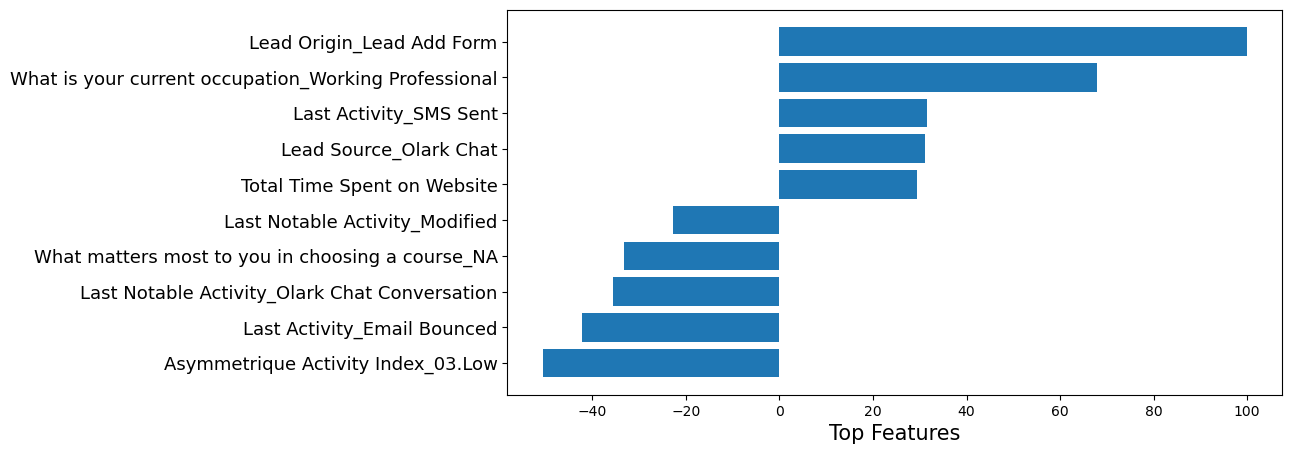

In [184]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_1.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

## <font color =brown> 13. Final Observations
    
    
Evaluation Metrics for the train Dataset:-
 - Accuracy: 81.01%
 - Sensitivity (Recall): 80.72%
 - Specificity: 81.19%
 - Precision: 72.59%
 - Recall: 80.72%
    
    
Evaluation Metrics for the test Dataset:-
 - Accuracy: 79.72%
 - Sensitivity (Recall): 78.63%
 - Specificity: 80.42%
 - Precision: 72.07%
 - Recall: 78.63%

## <font color = brown> 14. Recommendations

Conversion of the below is much easier and should be leveraged - 
- **Lead Origin_Lead Add Form** - The leads produced from this source have been found to opt for the course most of the time.
- **What is your current occupation_Working Professional** - Working Professionals should be targeted for the sale of courses.
- **Last Activity_SMS Sent** - The leads converted mostly reach out via sms communication chain and are potential leads.
- **Lead Source_Olark Chat** - Leads sourced from Olark Chat have more conversion potential.
- **Total Time Spent on Website** - Higher the time spent on the website, results in higher conversion of the lead.